*   Name: Yuan Feng
*   Student_id: 610972
*   E_mail: yuanfeng0803@gmail.com

#1.Introduction
The assignmemt asks me to predict if the customers would return their clothes or not. According to the assignment, I select some related features as independent variables, and the target varible is either return or not.
Based on these features, I build the model to find the link between the two and predict the probabilty of customers returning their clothes. And based on cost matrix, I find the cost minimal cutoff and predict if the customer return or not with the cutoff.

##1.1 read the known data from google drive

In [1]:
#import necessary libariries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns

# Load/save data from/to disk 




load the data from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Reading knowndata.csv
file='drive/MyDrive/kaggle/known.csv'
train=pd.read_csv(file)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_item_id  100000 non-null  int64  
 1   order_date     100000 non-null  object 
 2   delivery_date  90682 non-null   object 
 3   item_id        100000 non-null  int64  
 4   item_size      100000 non-null  object 
 5   item_color     100000 non-null  object 
 6   brand_id       100000 non-null  int64  
 7   item_price     100000 non-null  float64
 8   user_id        100000 non-null  int64  
 9   user_title     100000 non-null  object 
 10  user_dob       91275 non-null   object 
 11  user_state     100000 non-null  object 
 12  user_reg_date  100000 non-null  object 
 13  return         100000 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 10.7+ MB


In [4]:
train.head(50)

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
1,2,2016-06-22,NaN,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
5,6,2016-06-22,2016-06-27,579,xxl,grey,3,19.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
6,7,2016-06-22,2016-06-27,72,41,grey,1,119.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0
7,8,2016-06-22,2016-06-27,106,50,white,6,39.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
8,9,2016-06-22,2016-06-27,195,xxl,blue,46,13.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1
9,10,2016-06-22,2016-06-27,195,xxl,grey,46,19.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1


##1.2 read the unknown data from google drive

In [5]:
# read unkown data
file0='drive/MyDrive/kaggle/unknown.csv'
test=pd.read_csv(file0)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_item_id  50000 non-null  int64  
 1   order_date     50000 non-null  object 
 2   delivery_date  44155 non-null  object 
 3   item_id        50000 non-null  int64  
 4   item_size      50000 non-null  object 
 5   item_color     50000 non-null  object 
 6   brand_id       50000 non-null  int64  
 7   item_price     50000 non-null  float64
 8   user_id        50000 non-null  int64  
 9   user_title     50000 non-null  object 
 10  user_dob       44887 non-null  object 
 11  user_state     50000 non-null  object 
 12  user_reg_date  50000 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 5.0+ MB


In [6]:
test.head(50)

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date
0,100001,2016-10-15,2017-01-10,1591,40,anthracite,9,69.90,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16
1,100002,2016-10-15,2017-01-10,1589,m,red,11,69.90,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16
2,100003,2016-10-15,2017-01-10,1589,s,red,11,69.90,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16
3,100004,2016-10-15,2017-01-10,1776,unsized,berry,41,49.90,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16
4,100005,2016-10-15,2017-01-10,2140,unsized,grey,102,59.90,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16
5,100006,2016-10-15,2017-01-10,1506,unsized,green,102,49.90,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16
6,100007,2016-10-15,2017-01-10,1847,38,grey,74,89.90,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16
7,100008,2016-10-15,2017-01-10,1847,40,grey,74,89.90,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16
8,100009,2016-10-15,2016-10-16,1749,42,black,43,99.90,11226,Mrs,1964-06-14,Lower Saxony,2016-05-30
9,100010,2016-10-15,2016-10-16,1630,xxl,white,37,49.90,11226,Mrs,1964-06-14,Lower Saxony,2016-05-30


#2.Data preparation
I do data cleaning and data processing this part, including delete some errors,  changing data type, check missing values and categorize some features, etc.

In [7]:
#Check the missing values
train.isnull().sum().sort_values(ascending=False)

delivery_date    9318
user_dob         8725
return              0
user_reg_date       0
user_state          0
user_title          0
user_id             0
item_price          0
brand_id            0
item_color          0
item_size           0
item_id             0
order_date          0
order_item_id       0
dtype: int64

In [8]:
#Check the missing values
test.isnull().sum().sort_values(ascending=False)

delivery_date    5845
user_dob         5113
user_reg_date       0
user_state          0
user_title          0
user_id             0
item_price          0
brand_id            0
item_color          0
item_size           0
item_id             0
order_date          0
order_item_id       0
dtype: int64

In [9]:
df=train.copy()

In [10]:
df['return'].value_counts(dropna=False)

0    54182
1    45818
Name: return, dtype: int64

##2.1 user dob
Based on the infomation of date of birthday, I create a new variable called 'age'. Since there are missing values in dob, and I use mode replace the missing data. 

In [11]:
from datetime import datetime
import calendar

In [12]:
df.loc[:,'user_dob']=pd.to_datetime(df.loc[:,'user_dob'],format='%Y-%m-%d',errors='coerce')
df.loc[:,'order_date']=pd.to_datetime(df.loc[:,'order_date'],format='%Y-%m-%d',errors='coerce')

In [13]:
df['age']=(df['order_date'].dt.year)-(df['user_dob'].dt.year)

In [14]:
agemode=df.age.mode() #the mode of known data is 50
agemode

0    50.0
dtype: float64

In [15]:
#replce missing age data
#we decide to use the mode to replace the missing data
df['age'] = df['age'].fillna(50)

In [16]:
df['age'].isnull().sum()

0

In [17]:
df['age']=df['age'].astype('int32')

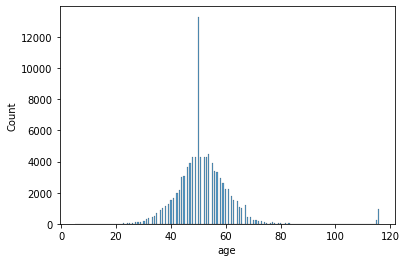

In [18]:
sns.histplot(df['age'])

From the distribution of age, which shows there exists outlier. Those outliers could be caused by wrong dob infomation. 

In [19]:
df['age'].quantile(0.99)

115.0

In [20]:
df['age'].quantile(0.01)

31.0

In [21]:
(df['age']<31).sum()

825

The 99% and 1% show 115 years old and 31 years old, It shows that most of our clothes are not target for children and teenages. The majority group is mid-age group.

In [22]:
#choose the age which between 31 and 115
df['age'] = np.where((df.age > 115),115,df.age)
df['age'] = np.where((df.age < 31),31,df.age)

Because there are missing data in unknown dataset, I apply the same procesure to it



In [23]:
test.loc[:,'user_dob']=pd.to_datetime(test.loc[:,'user_dob'],format='%Y-%m-%d',errors='coerce')
test.loc[:,'order_date']=pd.to_datetime(test.loc[:,'order_date'],format='%Y-%m-%d',errors='coerce')

In [24]:
test['age']=(test['order_date'].dt.year)-(test['user_dob'].dt.year)

In [25]:
test['age'] = test['age'].fillna(50)

In [26]:
test['age']=test['age'].astype('int32')

In [27]:
#choose the age which between 10 and 80
test['age'] = np.where((test.age > 80),80,test.age)
test['age'] = np.where((test.age < 10),10,test.age)

##2.2 Order date and delivery date
This part, I create a new column called delivery time, which is the difference between order date and delivery date, and another new column called delivery day which shows the exact weekday of delivery date.

###2.2.1 Delivery time

In [28]:
df.loc[:,'delivery_date']=pd.to_datetime(df.loc[:,'delivery_date'],format='%Y-%m-%d',errors='coerce')
df['delivery_time']=(df['delivery_date'])-(df['order_date'])

In [29]:
df['delivery_time']

0           5 days
1              NaT
2           5 days
3           5 days
4           5 days
           ...    
99995       1 days
99996       1 days
99997   -7925 days
99998   -7925 days
99999      27 days
Name: delivery_time, Length: 100000, dtype: timedelta64[ns]

In [30]:
df['delivery_time']=df['delivery_time'].dt.days

In [31]:
df_delivery=df.copy()

In [32]:
#delete the delivery time which are negative, which can be caused by wrong infp
df_delivery.drop(df_delivery[(df_delivery.delivery_time < 0)].index)

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,age,delivery_time
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,5.0
1,2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,NaN
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,46,5.0
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,99994,2016-09-11,2016-09-13,1681,48,anthracite,9,69.90,9580,Mrs,1958-04-24,Baden-Wuerttemberg,2015-02-17,1,58,2.0
99994,99995,2016-09-11,2016-09-13,1600,xl,green,75,219.90,9580,Mrs,1958-04-24,Baden-Wuerttemberg,2015-02-17,0,58,2.0
99995,99996,2016-09-11,2016-09-12,156,20,blue,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0
99996,99997,2016-09-11,2016-09-12,156,20,brown,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0


In [33]:
df_delivery['delivery_time'].mode()#we find the most common delivery time is 2 days and replace 2 days to missing data

0    2.0
dtype: float64

Since I get the mode of delivery time is 2 days, I choose 2 to replace nagetive delivery time and NA.

In [34]:
df['delivery_time']= np.where((df.delivery_time< 0),2,df.delivery_time)

In [35]:
df

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,age,delivery_time
0,1,2016-06-22,2016-06-27,643,38,navy,30,49.90,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,5.0
1,2,2016-06-22,NaT,337,152,grey,30,19.95,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,NaN
2,3,2016-06-22,2016-06-27,270,xxl,grey,49,79.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0
3,4,2016-06-22,2016-06-27,142,xxl,grey,49,99.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,46,5.0
4,5,2016-06-22,2016-06-27,561,xxl,grey,3,14.90,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2016-09-11,2016-09-12,156,20,blue,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0
99996,99997,2016-09-11,2016-09-12,156,20,brown,34,29.90,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0
99997,99998,2016-09-11,1994-12-31,1832,xxl,black,37,26.90,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,31,2.0
99998,99999,2016-09-11,1994-12-31,1832,xxl,black,37,26.90,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,31,2.0


In [36]:
df['delivery_time'] = df['delivery_time'].fillna(2)

In [37]:
df['delivery_time'].isnull().sum()

0

###2.2.2 Delivery day 

In [38]:
df['delivery_date'] = pd.DataFrame(df['delivery_date'], )
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
df['day_of_week'] = df['delivery_date'].dt.day_name()

In [39]:
#I find there is no Friday in the dataset, so I assume the NA is Friday
df['day_of_week'] = df['day_of_week'].fillna('Friday')


Because there are missing data in unknown dataset, I apply the same procesure to it

In [40]:
test.loc[:,'delivery_date']=pd.to_datetime(test.loc[:,'delivery_date'],format='%Y-%m-%d',errors='coerce')
test['delivery_time']=(test['delivery_date'])-(test['order_date'])

In [41]:
test['delivery_time']=test['delivery_time'].dt.days

In [42]:
#replace 2 days to the delivery time which are negative
test['delivery_time']= np.where((test.delivery_time< 0),2,test.delivery_time)

In [43]:
test['delivery_time'] =test['delivery_time'].fillna(2)

In [44]:
test['delivery_date'] = pd.DataFrame(test['delivery_date'], )
test['delivery_date'] = pd.to_datetime(test['delivery_date'])
test['day_of_week'] = test['delivery_date'].dt.day_name()

In [45]:
test['day_of_week'] = test['day_of_week'].fillna('Friday')

In [46]:
test

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,age,delivery_time,day_of_week
0,100001,2016-10-15,2017-01-10,1591,40,anthracite,9,69.9,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday
1,100002,2016-10-15,2017-01-10,1589,m,red,11,69.9,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday
2,100003,2016-10-15,2017-01-10,1589,s,red,11,69.9,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday
3,100004,2016-10-15,2017-01-10,1776,unsized,berry,41,49.9,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday
4,100005,2016-10-15,2017-01-10,2140,unsized,grey,102,59.9,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,2016-12-12,2016-12-13,1669,42,brown,43,89.9,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday
49996,149997,2016-12-12,2016-12-13,1409,L,ash,3,16.9,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday
49997,149998,2016-12-12,2016-12-13,114,42,brown,43,79.9,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday
49998,149999,2016-12-12,2016-12-13,1409,XL,ash,3,16.9,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday


##2.3 User registration date

In [47]:
df.loc[:,'user_reg_date']=pd.to_datetime(df.loc[:,'user_reg_date'],format='%Y-%m-%d',errors='coerce')

In [48]:
df['reg_time']=(df['order_date'])-(df['user_reg_date'])

In [49]:
df['reg_time']=df['reg_time'].dt.days

In [50]:
df['reg_time'] = np.where((df.reg_time<=0),0,df.reg_time)


Because there are missing data in unknown dataset, I apply the same procesure to it

In [51]:
test.loc[:,'user_reg_date']=pd.to_datetime(test.loc[:,'user_reg_date'],format='%Y-%m-%d',errors='coerce')

In [52]:
test['reg_time']=(test['order_date'])-(test['user_reg_date'])

In [53]:
test['reg_time']=test['reg_time'].dt.days

In [54]:
test['reg_time'] = np.where((test.reg_time<=0),0,test.reg_time)

In [55]:
test['reg_time']=test['reg_time'].astype('int32')

##2.3 Price

I assume that the probablity of returning clothing is higher when the price is higher. There are products with price equal to 0, because promotion and discounted sales.

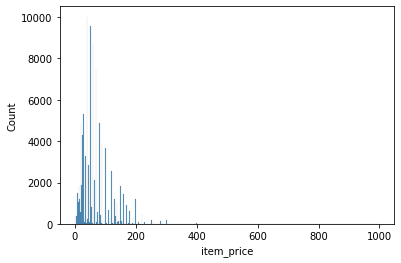

In [56]:
#get the distribution of outlier
sns.histplot(df['item_price'])

In [57]:
(df['item_price']==0).sum()

396

In [58]:
df['item_price'].quantile(0.99)

219.9

In [59]:
df['item_price'].quantile(0.01)

7.4

In [60]:
df['item_price']=df['item_price'].astype('int32')

In [61]:
#replace outliers with 99% and 1% quantile respectively
df['item_price'] = np.where((df.item_price > 219.9),219.9,df.item_price)
df['item_price'] = np.where((df.item_price < 7.4),7.4,df.item_price)

In [62]:
#def parse_values(x):
#    if x < 50:
#       return 1
#    elif x>=50 and x<100:
#       return 2
#    elif x>=100 and x<150:
#       return 3
#    elif x>=150 and x<200:
#       return 4
#    else:
#       return 5
#

In [63]:
#df['item_price']=df['item_price'].apply(parse_values)

In [64]:
#df.item_price.value_counts()

In [65]:
df['item_price']=df['item_price'].astype('int32')

In [66]:
#rearrange the index
df.reset_index(drop=True, inplace=True)

I apply the same procerdure to unknown dataset

In [67]:
(test['item_price']==0).sum()

134

In [68]:
#replace outliers with 99% and 1% quantile respectively
test['item_price'] = np.where((test.item_price > 219.9),219.9,test.item_price)
test['item_price'] = np.where((test.item_price < 7.4),7.4,test.item_price)

In [69]:
test['item_price']=test['item_price'].astype('int32')

In [70]:
#rearrange the index
test.reset_index(drop=True, inplace=True)

In [71]:
test

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,age,delivery_time,day_of_week,reg_time
0,100001,2016-10-15,2017-01-10,1591,40,anthracite,9,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
1,100002,2016-10-15,2017-01-10,1589,m,red,11,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
2,100003,2016-10-15,2017-01-10,1589,s,red,11,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
3,100004,2016-10-15,2017-01-10,1776,unsized,berry,41,49,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
4,100005,2016-10-15,2017-01-10,2140,unsized,grey,102,59,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,2016-12-12,2016-12-13,1669,42,brown,43,89,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49996,149997,2016-12-12,2016-12-13,1409,L,ash,3,16,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49997,149998,2016-12-12,2016-12-13,114,42,brown,43,79,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49998,149999,2016-12-12,2016-12-13,1409,XL,ash,3,16,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664


##2.4 Item size

There are different standards in item size, like m, M and 38 refer to the same size, so I change item_size into european standard

In [72]:
df11=df.copy()

In [73]:
df11.item_size.value_counts()

l       12347
xl      10979
m       10190
xxl      8966
40       7693
        ...  
84          1
3834        1
105         1
12+         1
3634        1
Name: item_size, Length: 102, dtype: int64

In [74]:
isize = {'m':'38', 'M':'38', 'l':'42', 'L':'42', 'xl':'46', 'XL':'46', '43+':'43',
     '37+':'37', '36+':'36', 'XXL':'50', 'xxl':'50', 's':'36', 'S':'36', 'XS':'34',
     'xs':'34', 'XXXL':'54', 'xxxl':'54', '8+':'36', '8':'36', '6+':'34', 
     '6':'34', '9+':'38', '9':'38', '4':'32', '4+':'32', '2':'30', 
     '2+':'30', '7':'36', '7+':'36', '5':'33', '5+':'33', '39+':'39', '38+':'38', '10':'38', '10+':'38', '11':'39',
     '40+':'40', '21':'48', '20':'48', '42+':'42', '41+':'41', '44+':'44', '45+':'45','46+':'46'
     }
for k in isize:
  df11['item_size'] = df11['item_size'].replace(k,isize[k])


In [75]:
df11

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,age,delivery_time,day_of_week,reg_time
0,1,2016-06-22,2016-06-27,643,38,navy,30,49,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,5.0,Monday,0
1,2,2016-06-22,NaT,337,152,grey,30,19,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,2.0,Friday,0
2,3,2016-06-22,2016-06-27,270,50,grey,49,79,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0,Monday,465
3,4,2016-06-22,2016-06-27,142,50,grey,49,99,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,46,5.0,Monday,465
4,5,2016-06-22,2016-06-27,561,50,grey,3,14,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0,Monday,465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2016-09-11,2016-09-12,156,48,blue,34,29,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0,Monday,572
99996,99997,2016-09-11,2016-09-12,156,48,brown,34,29,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0,Monday,572
99997,99998,2016-09-11,1994-12-31,1832,50,black,37,26,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,31,2.0,Saturday,1
99998,99999,2016-09-11,1994-12-31,1832,50,black,37,26,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,31,2.0,Saturday,1


In [76]:
df11.item_size.value_counts()

42      17439
38      16996
46      12318
50       9114
40       7880
        ...  
3834        1
3132        1
49          1
105         1
3634        1
Name: item_size, Length: 65, dtype: int64

Select the most common item_ size and replace the left to others.

In [77]:
e = ['38','38','42','42','46','46','43','37','36','50','50','36','36','34','34','54','54','36','36','34','34','38','38','32','32',
                          '30','30','36','36','33','33','39','38','38','38','39','40','48','48','42','41','44','45','46']
from collections import Counter
g = [elem for elem, _ in Counter(e).most_common()]
g

['38',
 '36',
 '34',
 '42',
 '46',
 '50',
 '54',
 '32',
 '30',
 '33',
 '39',
 '48',
 '43',
 '37',
 '40',
 '41',
 '44',
 '45']

In [78]:
h = df11['item_size']
h

0         38
1        152
2         50
3         50
4         50
        ... 
99995     48
99996     48
99997     50
99998     50
99999     28
Name: item_size, Length: 100000, dtype: object

In [79]:
j = list(set(h).difference(set(g)))
for k in j:
    df11['item_size'] = df11['item_size'].replace(k,'others')
df11

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,age,delivery_time,day_of_week,reg_time
0,1,2016-06-22,2016-06-27,643,38,navy,30,49,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,5.0,Monday,0
1,2,2016-06-22,NaT,337,others,grey,30,19,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,2.0,Friday,0
2,3,2016-06-22,2016-06-27,270,50,grey,49,79,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0,Monday,465
3,4,2016-06-22,2016-06-27,142,50,grey,49,99,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,46,5.0,Monday,465
4,5,2016-06-22,2016-06-27,561,50,grey,3,14,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0,Monday,465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2016-09-11,2016-09-12,156,48,blue,34,29,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0,Monday,572
99996,99997,2016-09-11,2016-09-12,156,48,brown,34,29,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0,Monday,572
99997,99998,2016-09-11,1994-12-31,1832,50,black,37,26,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,31,2.0,Saturday,1
99998,99999,2016-09-11,1994-12-31,1832,50,black,37,26,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,31,2.0,Saturday,1


In [80]:
df11.item_size.value_counts()

42        17439
38        16996
46        12318
50         9114
40         7880
others     7677
39         6934
36         6805
41         4845
37         2364
44         2215
43         1545
48         1270
34         1089
33          651
32          380
45          222
30          146
54          110
Name: item_size, dtype: int64

In [81]:
len(df['item_size'])

100000

I apply the same procedure to unknown dataset

In [82]:
for k in isize:
  test['item_size'] = test['item_size'].replace(k,isize[k])

In [83]:
e = ['38','38','42','42','46','46','43','37','36','50','50','36','36','34','34','54','54','36','36','34','34','38','38','32','32',
                          '30','30','36','36','33','33','39','38','38','38','39','40','48','48','42','41','44','45','46']
from collections import Counter
g = [elem for elem, _ in Counter(e).most_common()]
g

['38',
 '36',
 '34',
 '42',
 '46',
 '50',
 '54',
 '32',
 '30',
 '33',
 '39',
 '48',
 '43',
 '37',
 '40',
 '41',
 '44',
 '45']

In [84]:
ht = test['item_size']
ht

0             40
1             38
2             36
3        unsized
4        unsized
          ...   
49995         42
49996         42
49997         42
49998         46
49999         46
Name: item_size, Length: 50000, dtype: object

In [85]:
jt = list(set(ht).difference(set(g)))
for k in jt:
    test['item_size'] = test['item_size'].replace(k,'others')
test

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,age,delivery_time,day_of_week,reg_time
0,100001,2016-10-15,2017-01-10,1591,40,anthracite,9,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
1,100002,2016-10-15,2017-01-10,1589,38,red,11,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
2,100003,2016-10-15,2017-01-10,1589,36,red,11,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
3,100004,2016-10-15,2017-01-10,1776,others,berry,41,49,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
4,100005,2016-10-15,2017-01-10,2140,others,grey,102,59,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,2016-12-12,2016-12-13,1669,42,brown,43,89,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49996,149997,2016-12-12,2016-12-13,1409,42,ash,3,16,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49997,149998,2016-12-12,2016-12-13,114,42,brown,43,79,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49998,149999,2016-12-12,2016-12-13,1409,46,ash,3,16,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664


##2.5 Item color

In [86]:
df11.item_color.value_counts()

black             18640
blue              10625
brown              8734
grey               8708
red                7264
                  ...  
currant purple        7
amethyst              5
avocado               4
creme                 4
opal                  2
Name: item_color, Length: 77, dtype: int64

In [87]:
icolor = {'aqua':'blue','aquamarine':'blue','azure':'blue','baltic blue':'blue','blau':'blue',"blue":'blue',"cobalt blue":'blue',"dark denim":'blue',"dark navy":'blue',"darkblue":'blue',"denim":'blue',"navy":'blue',"turquoise":'blue',
     "brown":"brown","brwon":"brown","curled":"brown","mahagoni":"brown","mocca":"brown","cortina mocca":"brown","copper coin":"brown",
     "dark oliv":"green","green":"green","jade":"green","khaki":"green","mint":"green","oliv":"green","olive":"green","opal":"green",
     "anthracite":"grey","ash":"grey","avocado":"grey","basalt":"grey","dark grey":"grey","ebony":"grey","graphite":"grey","grey":"grey","iron":"grey","petrol":"grey","silver":"grey",
     "creme":"white","white":"white","perlmutt":"white",
     "antique pink":"pink","coral":"pink","fuchsia":"pink","magenta":"pink","pallid":"pink","pink":"pink","terracotta":"pink","amethyst":"pink",
     "aubergine":"purple","currant purple":"purple","dark garnet":"purple","purple":"purple",
     "berry":"red","bordeaux":"red","crimson":"red","habana":"red","hibiscus":"red","red":"red",
     "almond":"yellow","apricot":"yellow","beige":"yellow","caramel":"yellow","champagner":"yellow","cognac":"yellow","coppercoin":"yellow","curry":"yellow","ecru":"yellow","floral":"yellow","ingwer":"yellow","ivory":"yellow","kanel":"yellow","lemon":"yellow","mango":"yellow","ocher":"yellow","orange":"yellow","vanille":"yellow","yellow":"yellow","gold":"yellow",
     "ancient":"cothers","aviator":"cothers","nature":"cothers","stained":"cothers","striped":"cothers",
     "?":"black","black":"black"
    }

for k in icolor:
  df11['item_color'] = df11['item_color'].replace(k,icolor[k])
df11

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,age,delivery_time,day_of_week,reg_time
0,1,2016-06-22,2016-06-27,643,38,blue,30,49,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,5.0,Monday,0
1,2,2016-06-22,NaT,337,others,grey,30,19,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,2.0,Friday,0
2,3,2016-06-22,2016-06-27,270,50,grey,49,79,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0,Monday,465
3,4,2016-06-22,2016-06-27,142,50,grey,49,99,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,46,5.0,Monday,465
4,5,2016-06-22,2016-06-27,561,50,grey,3,14,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0,Monday,465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2016-09-11,2016-09-12,156,48,blue,34,29,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0,Monday,572
99996,99997,2016-09-11,2016-09-12,156,48,brown,34,29,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0,Monday,572
99997,99998,2016-09-11,1994-12-31,1832,50,black,37,26,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,31,2.0,Saturday,1
99998,99999,2016-09-11,1994-12-31,1832,50,black,37,26,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,31,2.0,Saturday,1


In [88]:
df11.item_color.value_counts()

black      18701
grey       17063
blue       16020
brown      10891
red        10246
green       8270
yellow      5397
purple      5125
white       3260
cothers     2641
pink        2386
Name: item_color, dtype: int64

We apply the same procedure to unknown dataset

In [89]:
for k in icolor:
  test['item_color'] = test['item_color'].replace(k,icolor[k])
test

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,age,delivery_time,day_of_week,reg_time
0,100001,2016-10-15,2017-01-10,1591,40,grey,9,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
1,100002,2016-10-15,2017-01-10,1589,38,red,11,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
2,100003,2016-10-15,2017-01-10,1589,36,red,11,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
3,100004,2016-10-15,2017-01-10,1776,others,red,41,49,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
4,100005,2016-10-15,2017-01-10,2140,others,grey,102,59,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,2016-12-12,2016-12-13,1669,42,brown,43,89,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49996,149997,2016-12-12,2016-12-13,1409,42,grey,3,16,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49997,149998,2016-12-12,2016-12-13,114,42,brown,43,79,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49998,149999,2016-12-12,2016-12-13,1409,46,grey,3,16,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664


##2.6 Brand ID

In [90]:
# Store data frame to disk
#DATA_DIR = '/content/drive/My Drive/BADS/'
#file_name = 'df1.pkl'
#df.to_pickle(DATA_DIR + file_name)

In [91]:
# Load data frame from disk
#file_name = 'df1.pkl'
#dff1= pd.read_pickle(DATA_DIR + file_name)

In [92]:
df11

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,age,delivery_time,day_of_week,reg_time
0,1,2016-06-22,2016-06-27,643,38,blue,30,49,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,5.0,Monday,0
1,2,2016-06-22,NaT,337,others,grey,30,19,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,2.0,Friday,0
2,3,2016-06-22,2016-06-27,270,50,grey,49,79,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0,Monday,465
3,4,2016-06-22,2016-06-27,142,50,grey,49,99,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,46,5.0,Monday,465
4,5,2016-06-22,2016-06-27,561,50,grey,3,14,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0,Monday,465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2016-09-11,2016-09-12,156,48,blue,34,29,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0,Monday,572
99996,99997,2016-09-11,2016-09-12,156,48,brown,34,29,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0,Monday,572
99997,99998,2016-09-11,1994-12-31,1832,50,black,37,26,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,31,2.0,Saturday,1
99998,99999,2016-09-11,1994-12-31,1832,50,black,37,26,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,31,2.0,Saturday,1


In [93]:
df11.brand_id.value_counts()

3      11389
1       8381
5       5039
37      4716
11      4236
       ...  
109        1
129        1
115        1
121        1
100        1
Name: brand_id, Length: 135, dtype: int64

In [94]:
df2=df11.copy()

In [95]:
#select the top 50 brand_id and replace the left to bother
from collections import Counter
b = [elem for elem, _ in Counter(df2['brand_id']).most_common(50)]
b

[3,
 1,
 5,
 37,
 11,
 20,
 6,
 17,
 38,
 43,
 42,
 46,
 29,
 28,
 40,
 14,
 49,
 113,
 47,
 21,
 30,
 25,
 48,
 19,
 54,
 33,
 36,
 53,
 31,
 50,
 4,
 18,
 7,
 102,
 12,
 45,
 51,
 2,
 34,
 55,
 24,
 69,
 39,
 15,
 72,
 44,
 23,
 110,
 90,
 26]

In [96]:
e = df2['brand_id']
f = list(set(e).difference(set(b)))
for k in f:
    df2['brand_id'] = df2['brand_id'].replace(k,'bothers')
df2

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return,age,delivery_time,day_of_week,reg_time
0,1,2016-06-22,2016-06-27,643,38,blue,30,49,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,5.0,Monday,0
1,2,2016-06-22,NaT,337,others,grey,30,19,30822,Mrs,1969-04-17,Saxony,2016-06-23,0,47,2.0,Friday,0
2,3,2016-06-22,2016-06-27,270,50,grey,49,79,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0,Monday,465
3,4,2016-06-22,2016-06-27,142,50,grey,49,99,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,0,46,5.0,Monday,465
4,5,2016-06-22,2016-06-27,561,50,grey,3,14,30823,Mrs,1970-04-22,Baden-Wuerttemberg,2015-03-15,1,46,5.0,Monday,465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2016-09-11,2016-09-12,156,48,blue,34,29,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0,Monday,572
99996,99997,2016-09-11,2016-09-12,156,48,brown,34,29,713,Mrs,1959-03-21,Rhineland-Palatinate,2015-02-17,0,57,1.0,Monday,572
99997,99998,2016-09-11,1994-12-31,1832,50,black,37,26,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,31,2.0,Saturday,1
99998,99999,2016-09-11,1994-12-31,1832,50,black,37,26,47794,Mr,1985-03-01,Hamburg,2016-09-10,0,31,2.0,Saturday,1


We apply the same procedure to unknown dataset

In [97]:
et = test['brand_id']
ft = list(set(et).difference(set(b)))
for k in ft:
    test['brand_id'] = test['brand_id'].replace(k,'bothers')
test

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,age,delivery_time,day_of_week,reg_time
0,100001,2016-10-15,2017-01-10,1591,40,grey,bothers,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
1,100002,2016-10-15,2017-01-10,1589,38,red,11,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
2,100003,2016-10-15,2017-01-10,1589,36,red,11,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
3,100004,2016-10-15,2017-01-10,1776,others,red,bothers,49,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
4,100005,2016-10-15,2017-01-10,2140,others,grey,102,59,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,2016-12-12,2016-12-13,1669,42,brown,43,89,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49996,149997,2016-12-12,2016-12-13,1409,42,grey,3,16,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49997,149998,2016-12-12,2016-12-13,114,42,brown,43,79,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49998,149999,2016-12-12,2016-12-13,1409,46,grey,3,16,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664


##2.7 Item ID

In [98]:
#select the top 80 item_id and replace the left with iother
from collections import Counter
i = [elem for elem, _ in Counter(df2['item_id']).most_common(100)]
i

[1415,
 1532,
 22,
 1401,
 100,
 32,
 1546,
 1470,
 1607,
 1445,
 1518,
 1404,
 498,
 242,
 255,
 1630,
 1628,
 57,
 1505,
 214,
 246,
 328,
 1409,
 173,
 1517,
 1547,
 1760,
 114,
 6,
 183,
 1687,
 108,
 1469,
 343,
 71,
 1489,
 1652,
 1507,
 1512,
 895,
 222,
 5,
 1622,
 190,
 273,
 226,
 138,
 70,
 313,
 1806,
 1677,
 1442,
 247,
 434,
 187,
 1412,
 1476,
 1485,
 8,
 1488,
 96,
 137,
 1640,
 204,
 113,
 165,
 191,
 1748,
 896,
 1506,
 1667,
 155,
 1554,
 142,
 1437,
 258,
 175,
 212,
 185,
 156,
 263,
 1535,
 157,
 1416,
 193,
 68,
 118,
 465,
 1666,
 116,
 272,
 143,
 279,
 1498,
 1556,
 133,
 557,
 1500,
 1576,
 135]

In [99]:
itid = df2['item_id']
ff = list(set(itid).difference(set(i)))
for k in ff:
    df2['item_id'] = df2['item_id'].replace(k,'iothers')

We apply the same procedure to unknown dataset

In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_item_id  50000 non-null  int64         
 1   order_date     50000 non-null  datetime64[ns]
 2   delivery_date  44155 non-null  datetime64[ns]
 3   item_id        50000 non-null  int64         
 4   item_size      50000 non-null  object        
 5   item_color     50000 non-null  object        
 6   brand_id       50000 non-null  object        
 7   item_price     50000 non-null  int32         
 8   user_id        50000 non-null  int64         
 9   user_title     50000 non-null  object        
 10  user_dob       44887 non-null  datetime64[ns]
 11  user_state     50000 non-null  object        
 12  user_reg_date  50000 non-null  datetime64[ns]
 13  age            50000 non-null  int32         
 14  delivery_time  50000 non-null  float64       
 15  day_of_week    5000

In [101]:
test

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,age,delivery_time,day_of_week,reg_time
0,100001,2016-10-15,2017-01-10,1591,40,grey,bothers,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
1,100002,2016-10-15,2017-01-10,1589,38,red,11,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
2,100003,2016-10-15,2017-01-10,1589,36,red,11,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
3,100004,2016-10-15,2017-01-10,1776,others,red,bothers,49,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
4,100005,2016-10-15,2017-01-10,2140,others,grey,102,59,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87.0,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,2016-12-12,2016-12-13,1669,42,brown,43,89,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49996,149997,2016-12-12,2016-12-13,1409,42,grey,3,16,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49997,149998,2016-12-12,2016-12-13,114,42,brown,43,79,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664
49998,149999,2016-12-12,2016-12-13,1409,46,grey,3,16,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1.0,Tuesday,664


In [102]:
test.item_id.value_counts()

1415    1269
1532    1163
1546     729
1470     713
1607     651
        ... 
946        1
1187       1
1123       1
1074       1
72         1
Name: item_id, Length: 1407, dtype: int64

In [103]:
test['item_id']=test['item_id'].astype('object')

In [104]:
itidt = test['item_id']
fft = list(set(itidt).difference(set(i)))
for k in fft:
    test['item_id'] = test['item_id'].replace(k,'iothers')

##2.8 df_clean and test_clean

In [105]:
df2['return']=df2['return'].astype('category')
df2['item_id']=df2['item_id'].astype('category')
df2['item_size']=df2['item_size'].astype('category')
df2['item_color']=df2['item_color'].astype('category')
df2['user_title']=df2['user_title'].astype('category')
df2['user_state']=df2['user_state'].astype('category')
df2['brand_id']=df2['brand_id'].astype('category')
df2['day_of_week']=df2['day_of_week'].astype('category')
df2['item_price']=df2['item_price'].astype('int32')
df2['age']=df2['age'].astype('int32')
df2['delivery_time']=df2['delivery_time'].astype('int32')
df2['reg_time']=df2['reg_time'].astype('int32')

In [106]:
df3=df2.loc[:,['return','age','delivery_time','item_price','reg_time','item_size','item_color','item_id','user_title','user_state','brand_id','day_of_week']]

In [107]:
test['item_id']=test['item_id'].astype('category')
test['item_size']=test['item_size'].astype('category')
test['item_color']=test['item_color'].astype('category')
test['user_title']=test['user_title'].astype('category')
test['user_state']=test['user_state'].astype('category')
test['brand_id']=test['brand_id'].astype('category')
test['day_of_week']=test['day_of_week'].astype('category')
test['item_price']=test['item_price'].astype('int32')
test['age']=test['age'].astype('int32')
test['delivery_time']=test['delivery_time'].astype('int32')
test['reg_time']=test['reg_time'].astype('int32')

In [108]:
test_clean=test.loc[:,['age','delivery_time','item_price','reg_time','item_size','item_color','item_id','user_title','user_state','brand_id','day_of_week']]

In [109]:
#save df_clean and test_clean to pickle
# Store data frame to disk
DATA_DIR = '/content/drive/My Drive/BADS/'
file_name = 'df3.pkl'
df3.to_pickle(DATA_DIR + file_name)
DATA_DIR = '/content/drive/My Drive/BADS/'
file_name = 'test_clean.pkl'
test_clean.to_pickle(DATA_DIR + file_name)

#3.Explanatory data analysis

##3.1 Univariate analysis


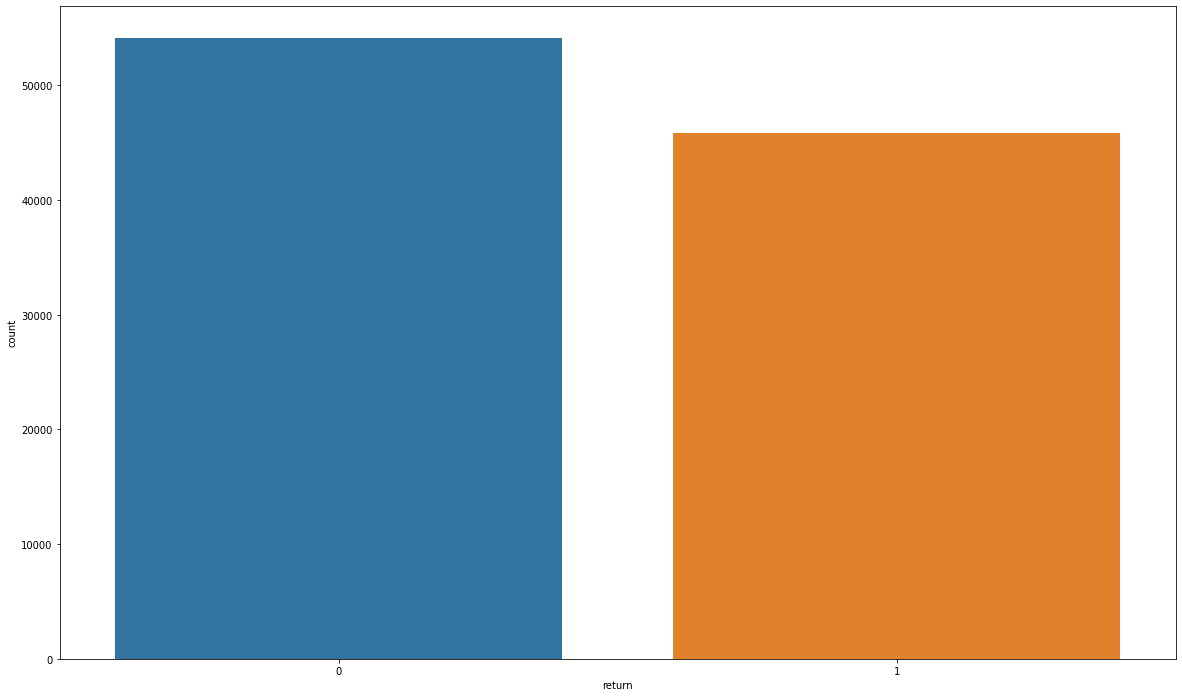

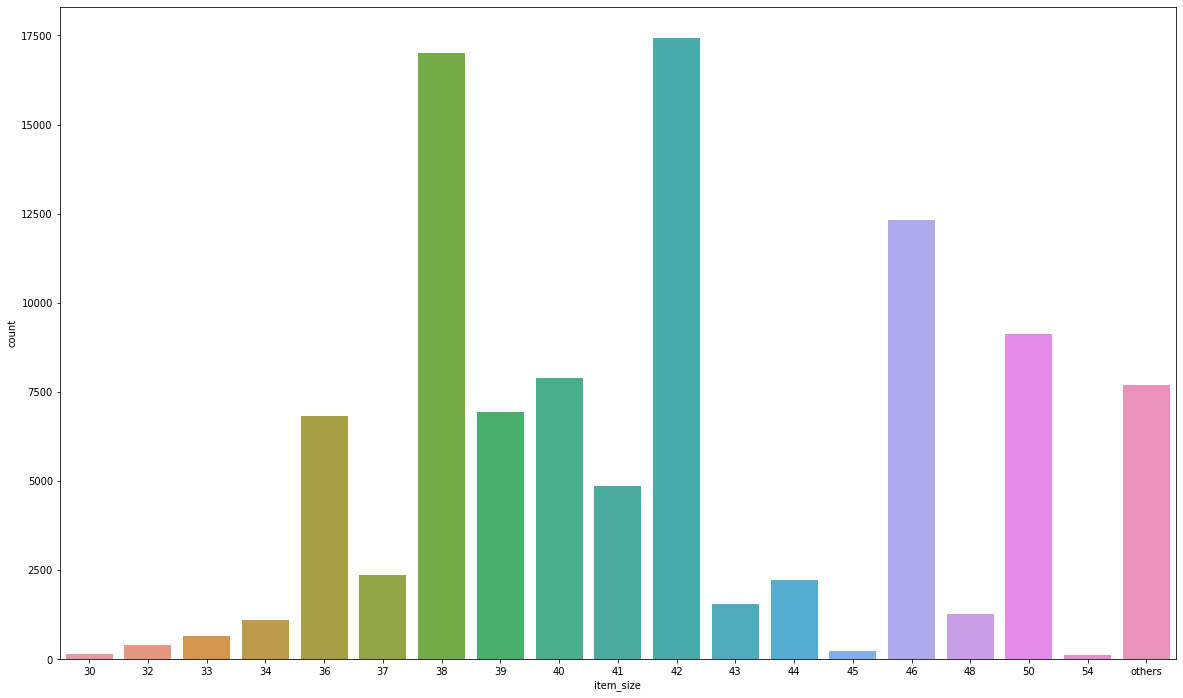

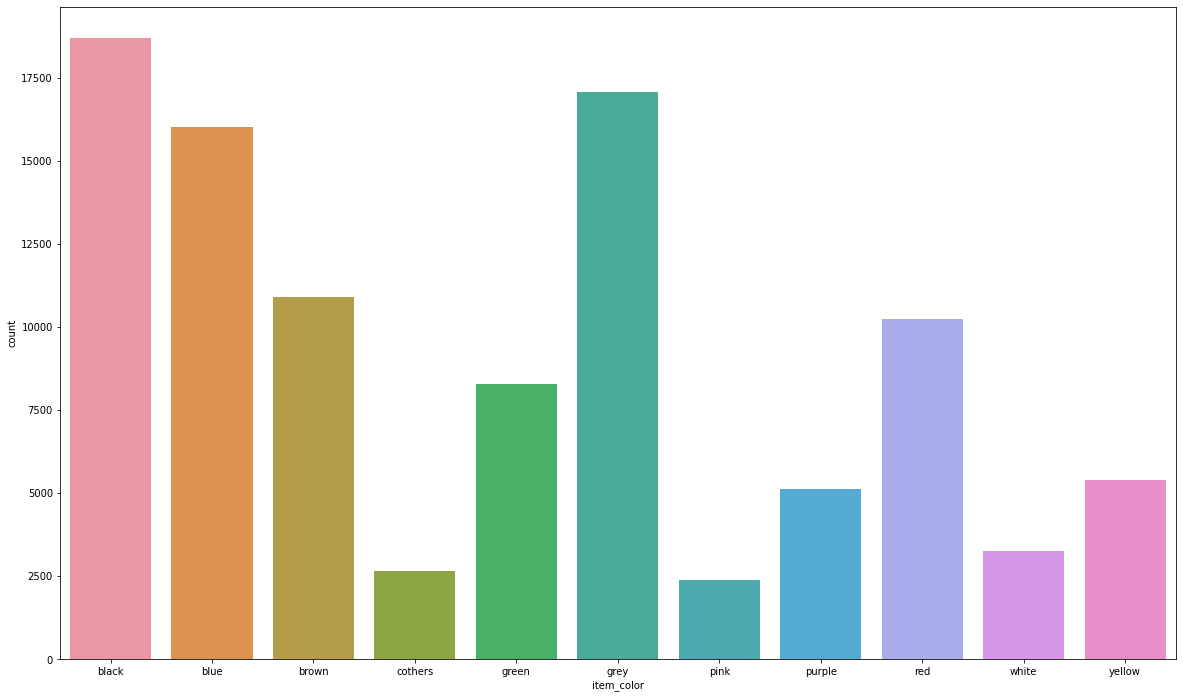

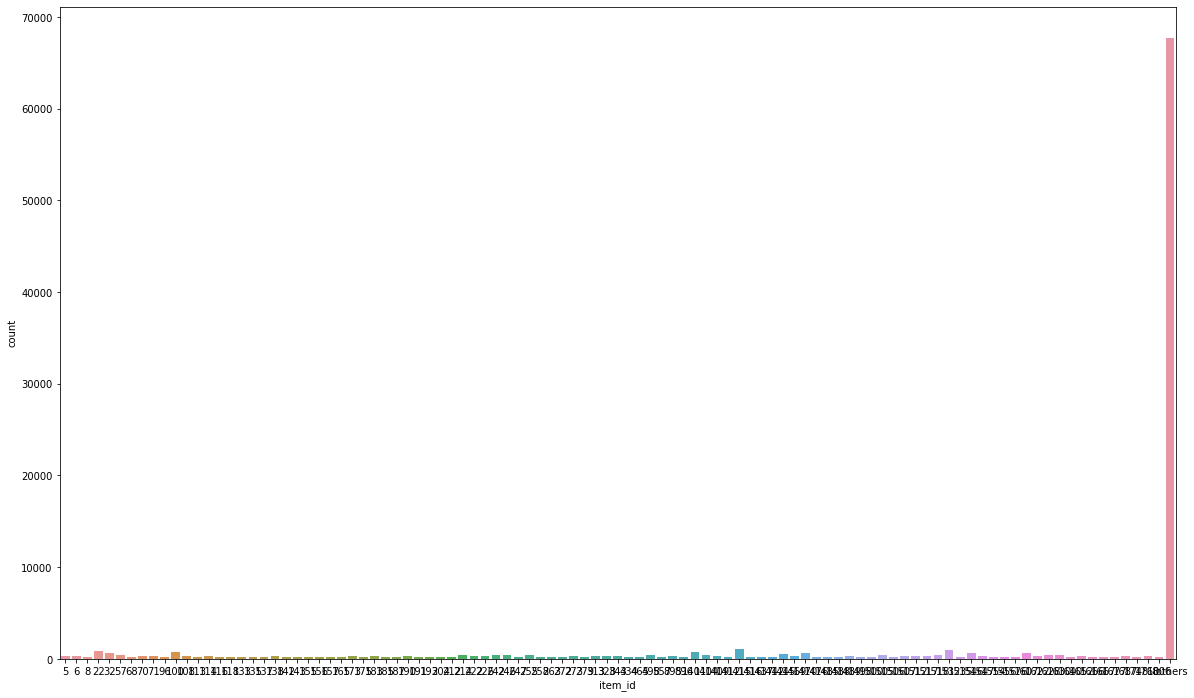

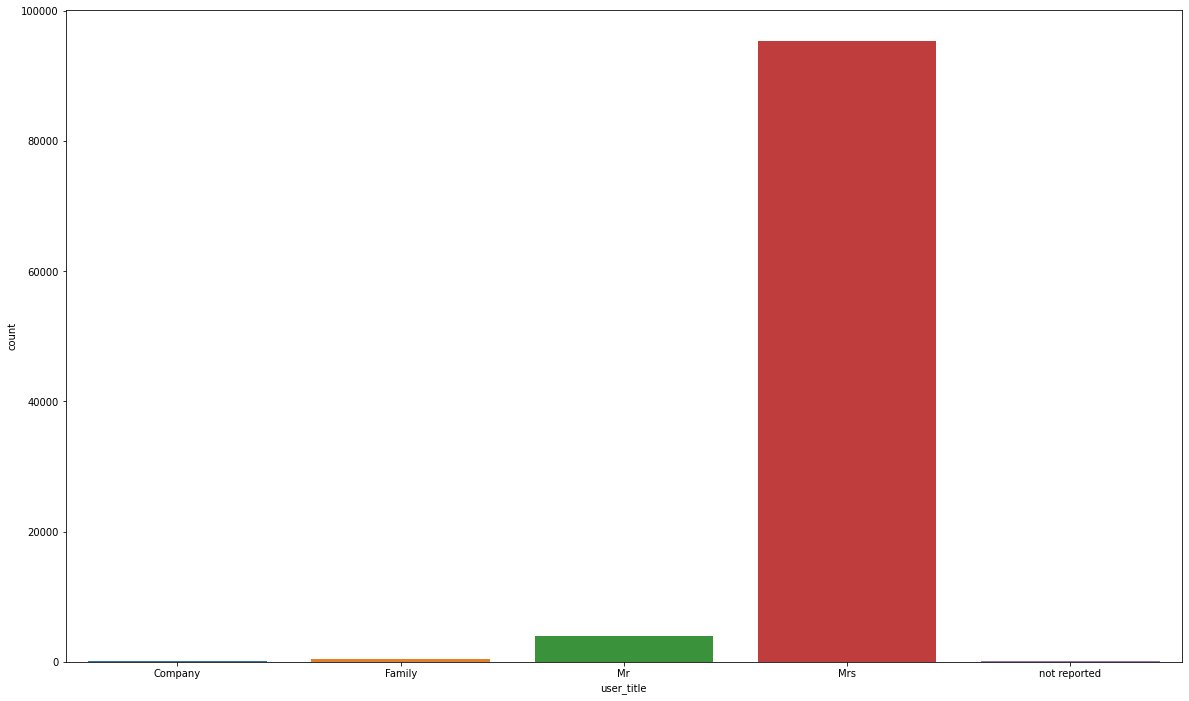

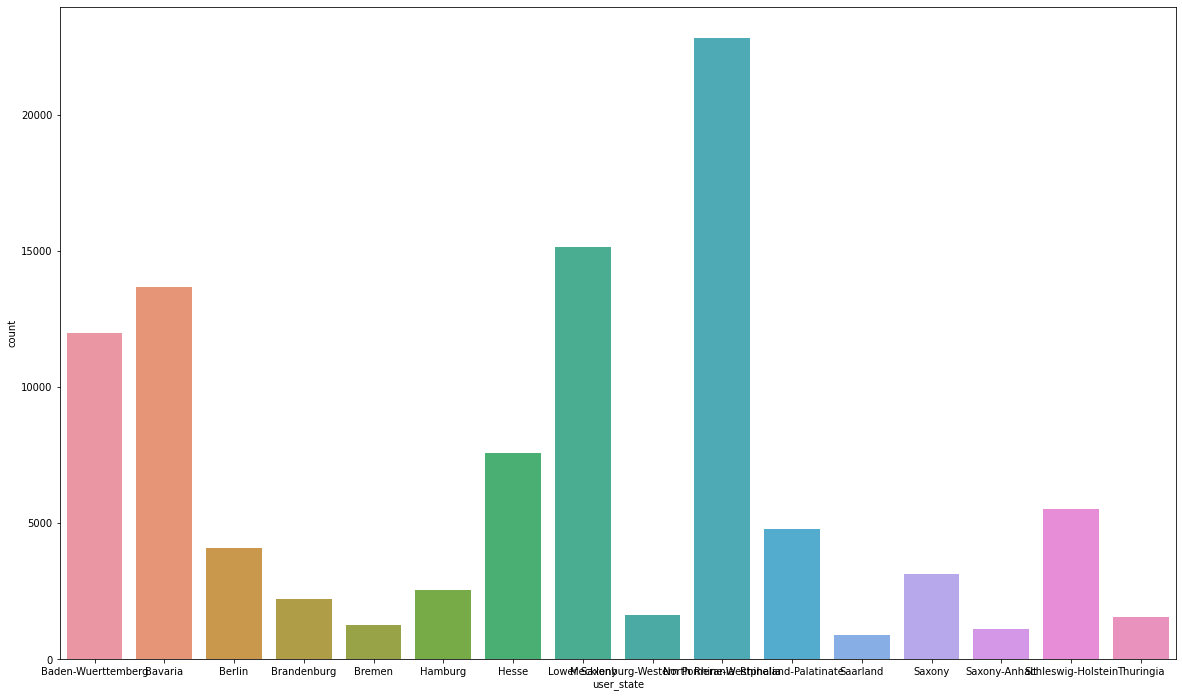

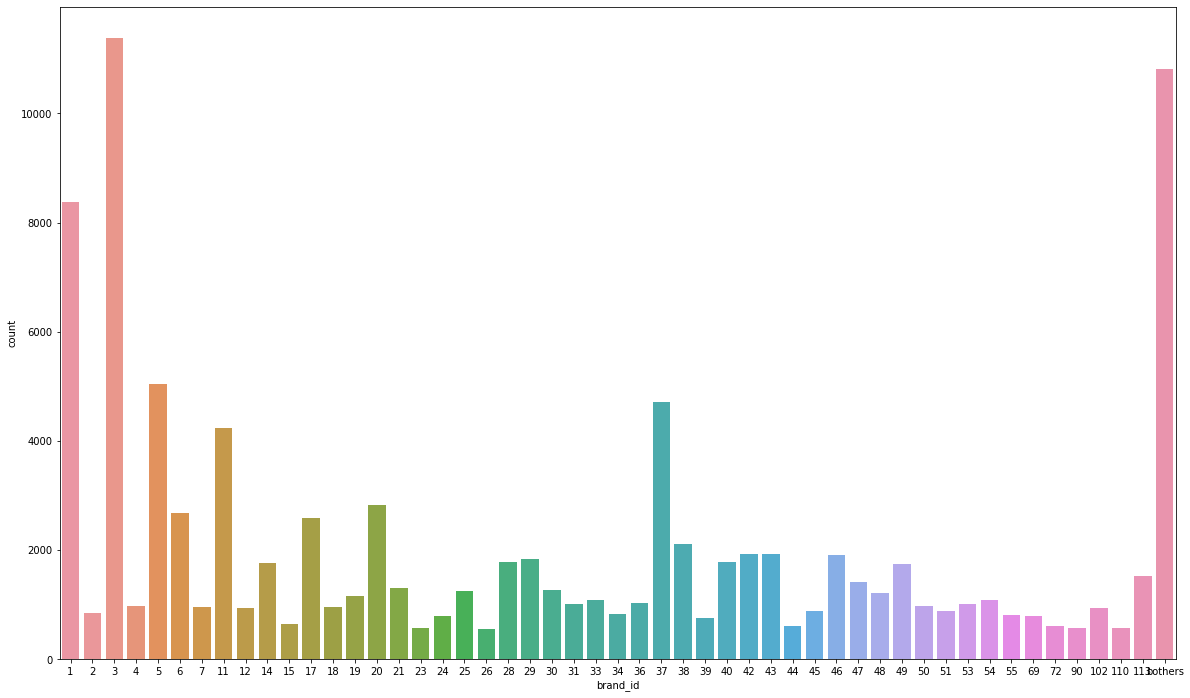

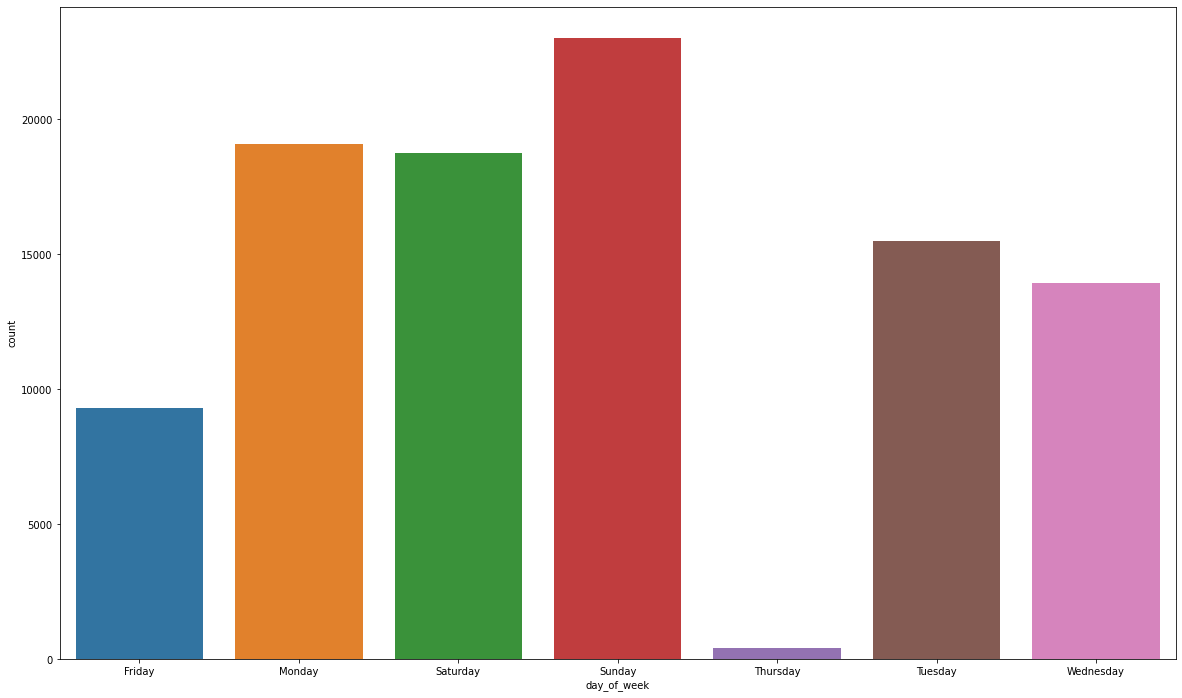

In [110]:
# univariate analysis of categorical variables
for i,col in enumerate(df3.select_dtypes('category').columns):
  plt.figure(figsize=(20,12))
  sns.countplot(x=col, data=df3)

From the plot above, 
I see there exists difference in a categorical variable. For example, in item_color, black and grey are the most popular color. As for the item_size, the most common sizes are 38 and 42.

<Figure size 1440x864 with 0 Axes>

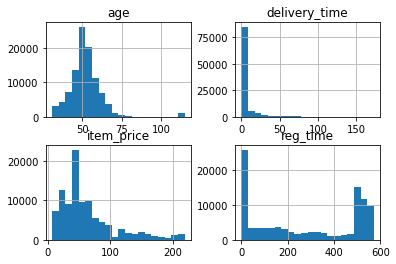

In [111]:
# univariate analysis of numerical variables
plt.figure(figsize=(20,12))
df3.select_dtypes('int32').hist(bins=20); 

Although I choose 99% and 1% quantile for age and item_price, there still exist outliers. As for delivery_time, the mode is 2 day, since we replace all NA and negative time with 2 days.

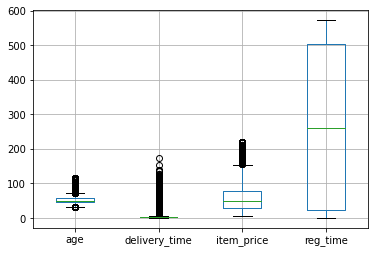

In [112]:
num_vars = df3.select_dtypes(include="int32")
df3.boxplot(column=list(num_vars));

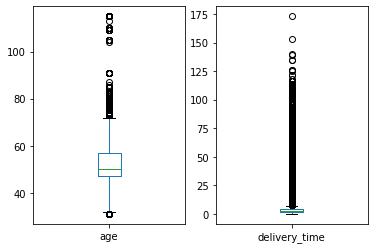

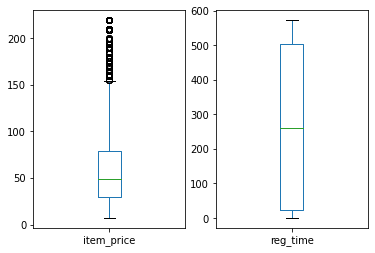

In [113]:
num_vars = df3.select_dtypes(include="int32")
half = np.ceil(num_vars.shape[1] / 2).astype(int) 
num_vars.iloc[:, 0:half].plot(kind = 'box', subplots=True);
num_vars.iloc[:, half:num_vars.shape[1]].plot(kind = 'box', subplots=True);

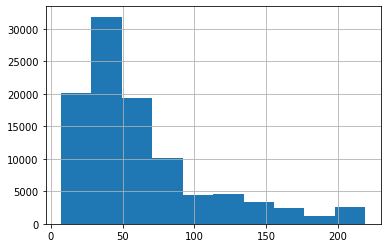

In [114]:
df3.item_price.hist();

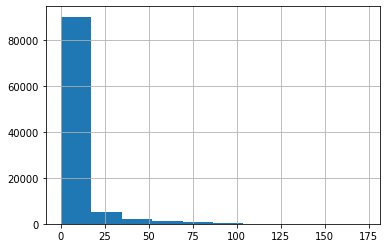

In [115]:
df3.delivery_time.hist();

##3.2 Multivariate analysis

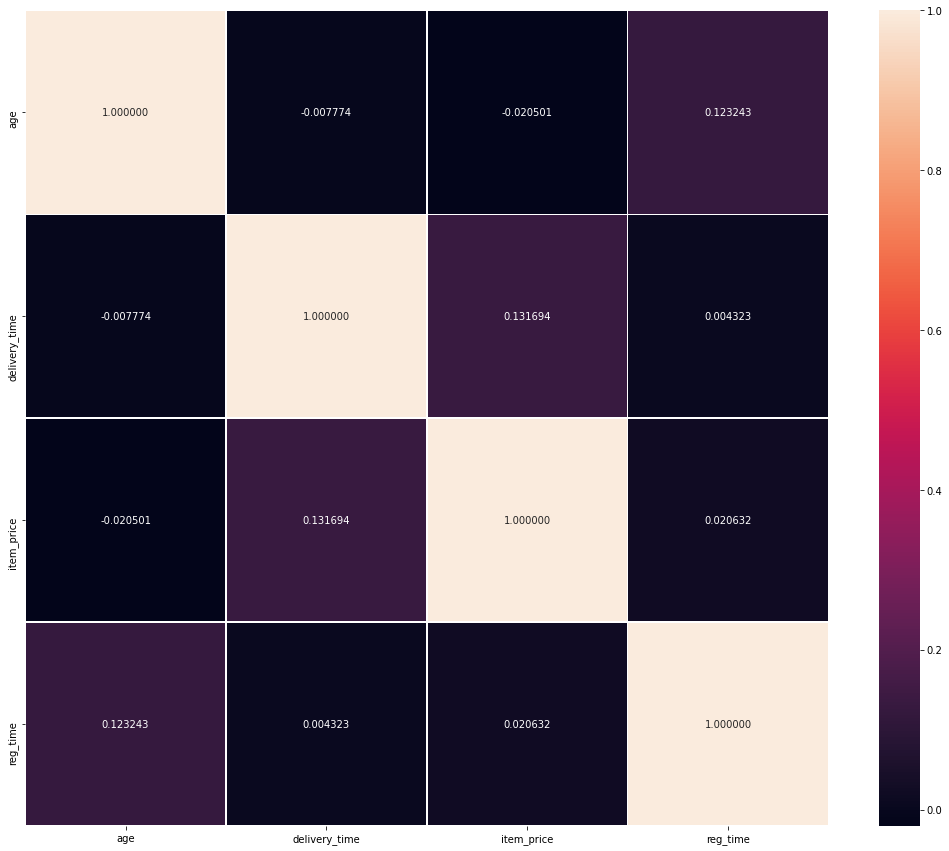

In [116]:
# Multivariate analysis of numerical variable
corr= df3.corr()
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr ,annot=True,linewidth=.5,fmt='1f');

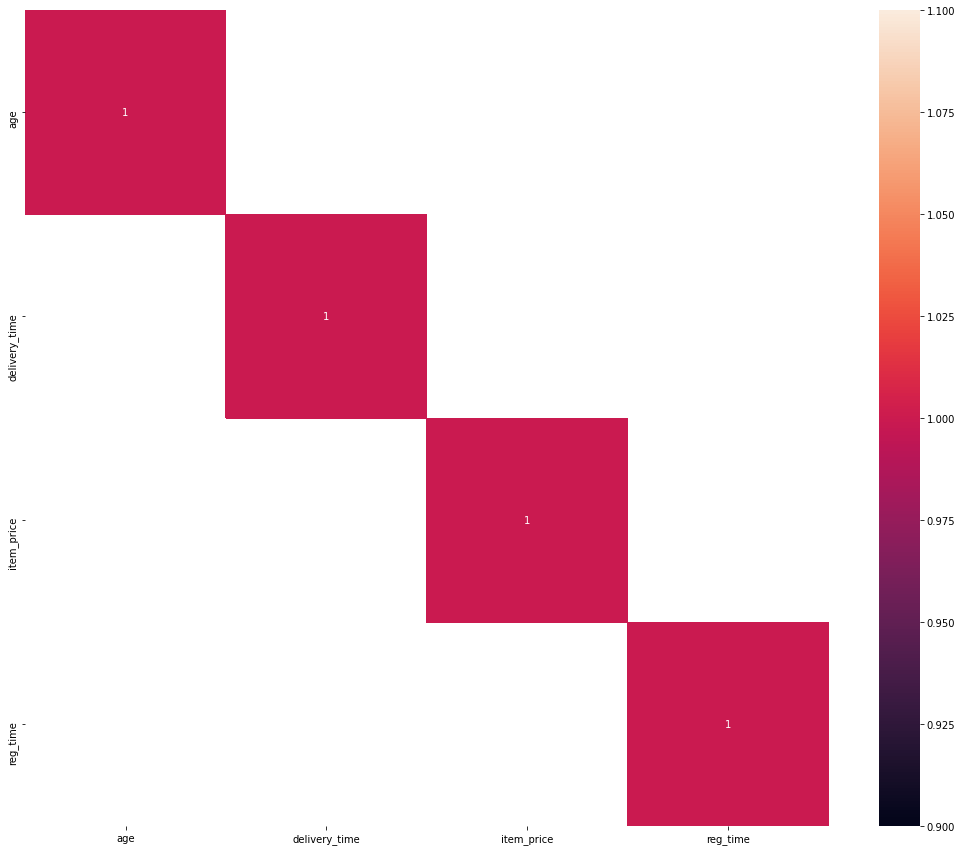

In [117]:
f,ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],annot=True);

From above, it shows the relationships among numerical variables are not strong. It is good for our following model analysis, because the strong correlation among independent variables cause larger errors.

In [118]:
df3.groupby("return").mean()

,age,delivery_time,item_price,reg_time
return,,,,
0,52.360673,6.580765,57.706083,266.958270
1,51.726243,7.147540,70.837073,281.654895


From above, I can see the different performance between keep group(return=0) and return group(return=1). It seems that the older people are more likely to keep it, and the more expensive clothes are more likely to be returned The delivery_time matters, because the customer may not use it and return back if it costs more time in delivery process. 

In [119]:
# Multivariate analysis of categorical variable
pd.crosstab(df3['item_size'],df3['return'])

return,0,1
item_size,,
30,72,74
32,208,172
33,351,300
34,531,558
36,3551,3254
37,1254,1110
38,9184,7812
39,3640,3294
40,3966,3914


From above, I could see there are difference between the two groups in item_size. But some differences are light.

In [120]:
pd.crosstab(df3['item_color'],df3['return'])

return,0,1
item_color,,
black,9908,8793
blue,8503,7517
brown,5645,5246
cothers,1402,1239
green,4624,3646
grey,9073,7990
pink,1469,917
purple,2938,2187
red,5799,4447


In [121]:
pd.crosstab(df3['user_state'],df3['return'])

return,0,1
user_state,,
Baden-Wuerttemberg,6523,5458
Bavaria,7280,6392
Berlin,2201,1892
Brandenburg,1201,1030
Bremen,734,524
Hamburg,1431,1104
Hesse,4100,3486
Lower Saxony,8110,7039
Mecklenburg-Western Pomerania,855,785


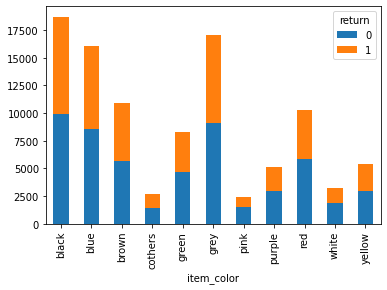

In [122]:
color = df3.groupby(['return', 'item_color']).size().reset_index().pivot(columns='return', index='item_color', values=0)
                                                                       
color.plot(kind='bar', stacked=True);

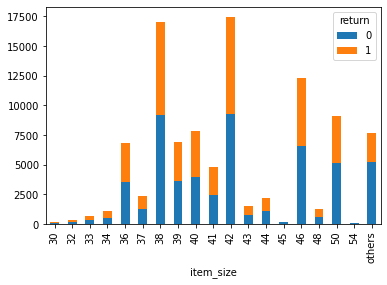

In [123]:
size= df3.groupby(['return', 'item_size']).size().reset_index().pivot(columns='return', index='item_size', values=0)
                                                                       
size.plot(kind='bar', stacked=True); 

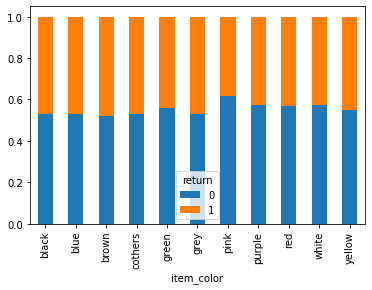

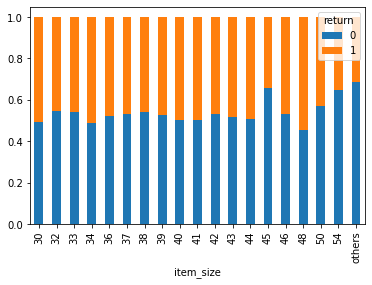

In [124]:
color.div(color.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
size.div(size.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True);


From these figures above, I see people´s prefernces in keeping and returning clothes. For example, people who bought pink clothes are more likely to keep it, and people who bought clothes with size 45 are more likely to keep it.

##3.3 Interactions between numeric and categorical variables 
The distribution of our categories across the numerical variables. 

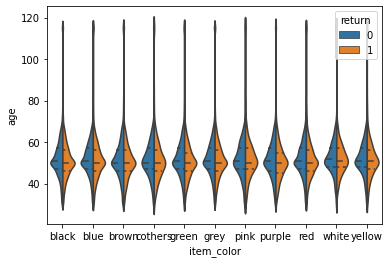

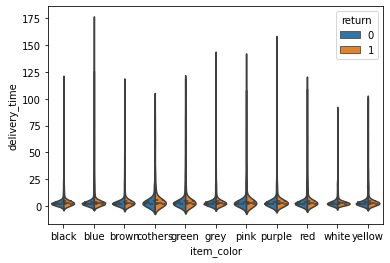

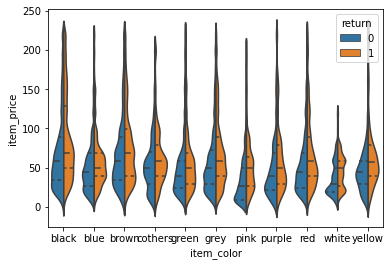

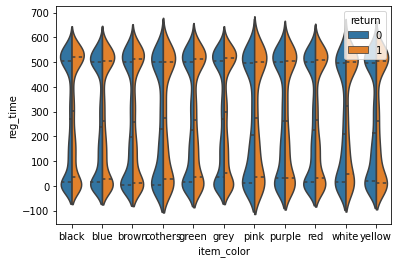

In [125]:
# We use the category 'item_color' and create one plot for each numeric variable
for col  in df3.select_dtypes(include='int32').columns:
    plt.figure()
    sns.violinplot(x='item_color', y=col, hue='return',
                   split=True, inner="quart",
                   data= df3, subplots=True)


From the picture above, the price of pink clothes are mostly higher than other color clothes and people are more willing to keep them.

#4.Model

This part, I use two model, one is logit model and the other is decision tree model.

##4.1 Logit model

In [126]:
# import the necessary packages
from sklearn.model_selection import train_test_split

In [127]:
df4=df3.copy()

In [128]:
categorical_cols=['item_size','item_color','item_id','user_title','user_state','brand_id','day_of_week']

In [129]:
cols=df4[categorical_cols]

In [130]:
df4[categorical_cols]= df4[categorical_cols].astype(str)

In [131]:
# Instantiate the OneHotEncoder Object
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)
# Apply ohe on data
ohe.fit(df4[categorical_cols])
cat_ohe = ohe.transform(df4[categorical_cols])

#Create a Pandas DataFrame of the hot encoded column
ohe_df = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names(input_features = categorical_cols))
#concat with original data and drop original columns
df_ohe = pd.concat([df4, ohe_df], axis=1).drop(columns = categorical_cols, axis=1)

In [132]:
df_ohe

,return,age,delivery_time,item_price,reg_time,item_size_30,item_size_32,item_size_33,item_size_34,item_size_36,item_size_37,item_size_38,item_size_39,item_size_40,item_size_41,item_size_42,item_size_43,item_size_44,item_size_45,item_size_46,item_size_48,item_size_50,item_size_54,item_size_others,item_color_black,item_color_blue,item_color_brown,item_color_cothers,item_color_green,item_color_grey,item_color_pink,item_color_purple,item_color_red,item_color_white,item_color_yellow,item_id_100,item_id_108,item_id_113,item_id_114,item_id_116,...,brand_id_28,brand_id_29,brand_id_3,brand_id_30,brand_id_31,brand_id_33,brand_id_34,brand_id_36,brand_id_37,brand_id_38,brand_id_39,brand_id_4,brand_id_40,brand_id_42,brand_id_43,brand_id_44,brand_id_45,brand_id_46,brand_id_47,brand_id_48,brand_id_49,brand_id_5,brand_id_50,brand_id_51,brand_id_53,brand_id_54,brand_id_55,brand_id_6,brand_id_69,brand_id_7,brand_id_72,brand_id_90,brand_id_bothers,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,47,5,49,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,47,2,19,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,46,5,79,465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,46,5,99,465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,46,5,14,465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,57,1,29,572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,0,57,1,29,572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,0,31,2,26,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99998,0,31,2,26,1,0.0,

In [133]:
numeric_cols = ['age','delivery_time','item_price','reg_time']
cat_cols = list(set(df_ohe.columns) - set(numeric_cols) - {'return'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['age', 'delivery_time', 'item_price', 'reg_time']
['brand_id_1', 'brand_id_102', 'brand_id_11', 'brand_id_110', 'brand_id_113', 'brand_id_12', 'brand_id_14', 'brand_id_15', 'brand_id_17', 'brand_id_18', 'brand_id_19', 'brand_id_2', 'brand_id_20', 'brand_id_21', 'brand_id_23', 'brand_id_24', 'brand_id_25', 'brand_id_26', 'brand_id_28', 'brand_id_29', 'brand_id_3', 'brand_id_30', 'brand_id_31', 'brand_id_33', 'brand_id_34', 'brand_id_36', 'brand_id_37', 'brand_id_38', 'brand_id_39', 'brand_id_4', 'brand_id_40', 'brand_id_42', 'brand_id_43', 'brand_id_44', 'brand_id_45', 'brand_id_46', 'brand_id_47', 'brand_id_48', 'brand_id_49', 'brand_id_5', 'brand_id_50', 'brand_id_51', 'brand_id_53', 'brand_id_54', 'brand_id_55', 'brand_id_6', 'brand_id_69', 'brand_id_7', 'brand_id_72', 'brand_id_90', 'brand_id_bothers', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'item_color_black', 

In [134]:
df_original_price=df_ohe.copy()

In [135]:
#Use MinMaxScaler to scale numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_ohe[numeric_cols])
df_ohe[numeric_cols]=scaler.transform(df_ohe[numeric_cols])

In [136]:
df_original_price['item_price'].max()

219

In [137]:
df_ohe['item_price'].min()

0.0

In [138]:
df_ohe['item_price'].max()

0.9999999999999999

In [139]:
#df_ohe['ii']=df_ohe['item_price']*(219-7)+7

In [140]:
#df_ohe['ii']

In [141]:
#df_original_price['item_price']

In [142]:
# Create random boolean array at a 70:30 ratio
np.random.seed(888)
split_sample = np.random.rand(len(df_ohe)) < 0.7 

# Use sample to create train and test set
X_train, y_train = df_ohe[split_sample].drop(['return'], axis=1), df_ohe[split_sample]['return']
X_test, y_test =  df_ohe[~split_sample].drop(['return'], axis=1), df_ohe[~split_sample]['return'] # use ~split_sample to select the opposite observations of split_sample

# Check shape 
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape)

(69971, 214) (30029, 214)
(69971,) (30029,)


In [143]:
#I create two new dataframe here to caculate the cost later.
#X_train['item_price_original']=X_train['item_price']
#X_test['item_price_original']=X_test['item_price']

In [144]:
# Estimate a logit model
from sklearn.linear_model import LogisticRegression

logit= LogisticRegression(penalty='none', fit_intercept=True)
model=logit.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [145]:
import sklearn.metrics as metrics

In [146]:
p = logit.predict_proba(X_train)
print(p)  

[[9.99967919e-01 3.20810666e-05]
 [3.82271467e-01 6.17728533e-01]
 [5.57756323e-01 4.42243677e-01]
 ...
 [2.66594154e-01 7.33405846e-01]
 [5.90737353e-01 4.09262647e-01]
 [7.11133156e-01 2.88866844e-01]]


In [147]:
print(logit.classes_)

[0 1]


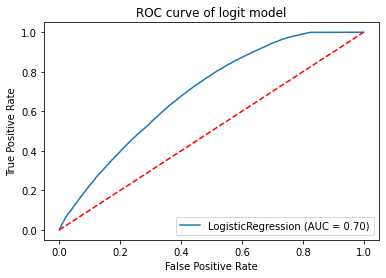

In [148]:
metrics.plot_roc_curve(logit, X_train, y_train)
plt.title('ROC curve of logit model')
plt.plot([0, 1], [0, 1], "r--")

In [149]:
# Re-calc accuracy of logit
acc = np.sum(logit.predict(X_train)==y_train) / len(y_train) 
print("Manually calculated accuracy: {:.4}".format(acc))

Manually calculated accuracy: 0.6341


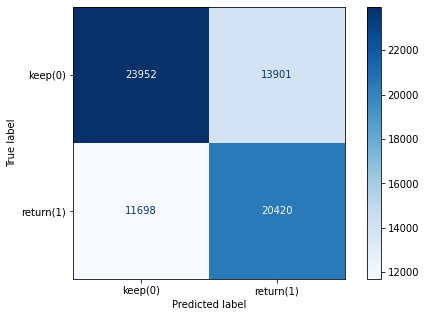

In [150]:
# confusion matrix
plt.rcParams["figure.figsize"] = (8,5)
metrics.plot_confusion_matrix(logit, X_train, y_train, labels=[0, 1], display_labels=['keep(0)', 'return(1)'], cmap='Blues',values_format='n')
plt.show()

##4.2 Decision Tree model

In [151]:
# Estimate a CART tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini', max_depth=20)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

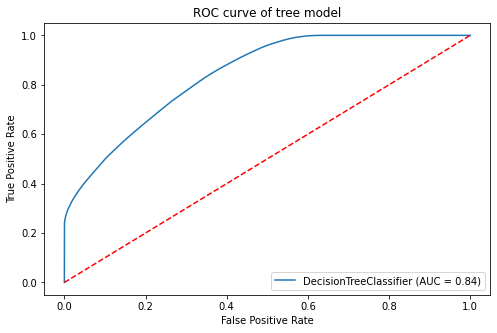

In [152]:
metrics.plot_roc_curve(tree, X_train, y_train)
plt.title('ROC curve of tree model')
plt.plot([0, 1], [0, 1], "r--")

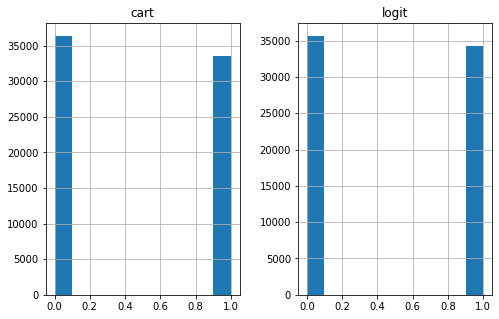

In [153]:
df_pred = pd.DataFrame({'y': y_train, 'cart': tree.predict(X_train), 'logit': logit.predict(X_train)})  
df_pred.hist();

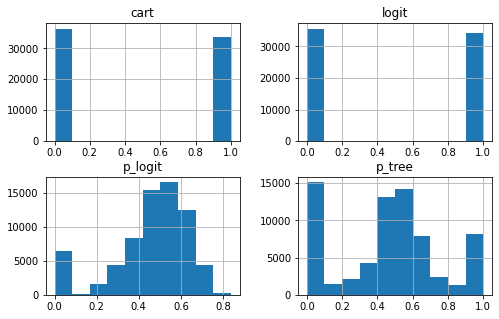

In [154]:
df_pred["p_logit"] = p[:,1]
df_pred["p_tree"] = tree.predict_proba(X_train)[:,1]

# plot the probabilistic predictions
df_pred.hist();

In [155]:
# Calculate the number of distinct values among the tree predictions
n_p_tree =  len(np.unique(df_pred["p_tree"]))
print('The number of unique predictions from the tree is: {}.'.format(n_p_tree))

# Extract the size of the tree in terms of the number of nodes
print('The number of leaf nodes is in tree is: {}.'.format(tree.get_n_leaves()))


The number of unique predictions from the tree is: 298.
The number of leaf nodes is in tree is: 4601.


In [156]:
print('Logit model scores {:.4}'.format(logit.score(X_train, y_train)))
print('Tree model scores {:.4}'.format(tree.score(X_train, y_train)))

Logit model scores 0.6341
Tree model scores 0.7347


##4.3 The performance of test dataset

Model trained: LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The AUC on the test set of this model is: 0.6928

Model trained: DecisionTreeClassifier
The AUC on the test set of this model is: 0.6582



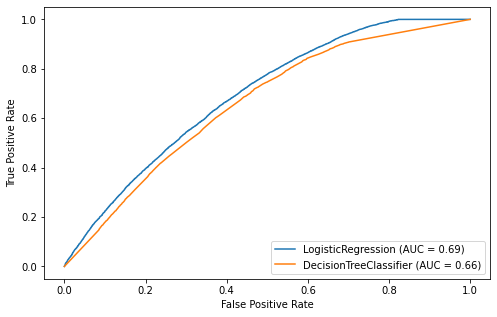

In [157]:
fig, ax = plt.subplots()
models = [logit, tree] 
# Loop to train and evaluate a model
for model in models: 
  print('Model trained: {}'.format(type(model).__name__))
  model.fit(X_train, y_train) 
  # Make prediction using the test set
  temp = model.predict_proba(X_test)[:,1] 
  # Calcuate AUC score by using the prediction and y_test 
  print('The AUC on the test set of this model is: {:.4f}'.format(metrics.roc_auc_score(y_test, temp))) # use our predictions on the test set and compare them to their actuals, y_test 
  print('')
  # Plot ROC curve
  metrics.plot_roc_curve(model, X_test, y_test, ax=ax) 

From test dataset, we would like to choose logistic regression, which performs better than decision tree classifier. 

#5.Cost sensitive learning

I get nearly 70% accuracy in logit model. Considering misclassification cost in reality. The cost changes as cutoff changes. I plan to choose the cutoff with minimal error cost

In [158]:
X_test.shape

(30029, 214)

In [159]:
pd.DataFrame({'actual_keep(0)': ['TP', 'FN'], 'actual_return(1)': ['FP', 'TN']}, index= ['predicted_keep(0)', 'predicted_return(1)']) 

,actual_keep(0),actual_return(1)
predicted_keep(0),TP,FP
predicted_return(1),FN,TN


In [160]:
cost_matrix = pd.DataFrame({'actual_keep(0)': [0, sum(0.5*df3['item_price'])], 'actual_return(1)': [sum(0.5*5*(3+0.1*df3['item_price'])), 0]}, index= ['predicted_keep(0)', 'predicted_return(1)'])
cost_matrix

,actual_keep(0),actual_return(1)
predicted_keep(0),0.0,2343061.0
predicted_return(1),3186122.0,0.0


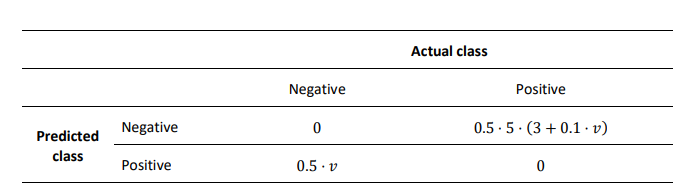

##5.1 Cost with default cutoff

This part I use the default cutoff(0,5) at first, and then caculate the total cost for misclassification.

In [161]:
pred_proba = logit.predict_proba(X_test)[:,1]
pred_default = np.where(pred_proba >= 0.5, 1, 0) # 0.5 is the default cut-off, equivalant to y_pred from above

In [162]:
y_pred_class = logit.predict(X_test)

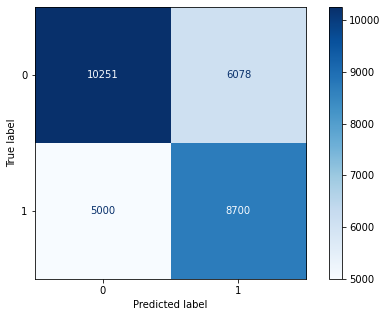

In [163]:
from sklearn import metrics 
metrics.plot_confusion_matrix(logit, X_test, y_test,  cmap=plt.cm.Blues, values_format='d') # Columns and rows have been transposed compared to above

In [164]:
# select the obeservations which belongs to false_positives
false_positives = np.logical_and(y_test != y_pred_class, y_pred_class == 1)
FP=X_test[false_positives]

In [165]:
# select the obeservations which belongs to false_negative
false_negative = np.logical_and(y_test != y_pred_class, y_pred_class == 0)
FN=X_test[false_negative]

In [166]:
fpc=sum(0.5*5*(3+0.1*(212*FP['item_price']+7))) #error cost for false_positives
fnc=sum(0.5*(212*FN['item_price']+7)) #error cost for false_negatives
error_cost_default=fpc+fnc
error_cost_default

277282.0

##5.1 Cost with Bayes optimal threshold

In [167]:
# Bayes optimal threshold
threshold_bayes = (cost_matrix.iloc[1,0]               # C(b,G)
                   /(cost_matrix.iloc[1,0]             # C(b,G)
                     +cost_matrix.iloc[0,1])).round(5) # C(g,B)
threshold_bayes

0.57624

In [168]:
y_pred_bayes = (logit.predict_proba(X_test)[:,1] >=threshold_bayes).astype(bool)

In [169]:
false_positive_bayes = np.logical_and(y_test != y_pred_bayes, y_pred_bayes == 1)
FP_bayes=X_test[false_positive_bayes]

In [170]:
false_negative_bayes = np.logical_and(y_test != y_pred_bayes, y_pred_bayes == 0)
FN_bayes=X_test[false_negative_bayes]

In [171]:
error_cost_bayes=sum(0.5*5*(3+0.1*(212*FP_bayes['item_price']+7)))+sum(0.5*(FN_bayes['item_price']*212+7))
error_cost_bayes

331819.75

In [172]:
from sklearn.metrics import accuracy_score
print("The accuracy of the model using the default cutoff is: {}".format(accuracy_score(y_test, pred_default)))
print("The accuracy of the model using the cost-minimal cutoff is: {}".format(accuracy_score(y_test, y_pred_bayes)))

The accuracy of the model using the default cutoff is: 0.631089946385161
The accuracy of the model using the cost-minimal cutoff is: 0.6129741250124879


In [173]:
# Save function to calculate error-cost including option to adjust cutoff
def calc_error_cost(y_probabilities, y_test, x_test,cutoff):
    pred = np.where(y_probabilities >= cutoff, 1, 0)
    false_positives = np.logical_and(y_test !=pred, pred == 1)
    FP=x_test[false_positives]
    false_negatives = np.logical_and(y_test !=pred, pred == 0)
    FN=x_test[false_negatives]
    cost=sum(0.5*5*(3+0.1*(FP['item_price']*212+7)))+sum(0.5*(FN['item_price']*212+7))                    # convert class probabilities into class predictions
      # calculate the corresponding cost
    return [cutoff, cost]

In [174]:
cmat_default = metrics.confusion_matrix(y_test, pred_default)
cmat_bayes = metrics.confusion_matrix(y_test, y_pred_bayes)

cutoff_cost_default = calc_error_cost(pred_default, y_test, X_test,0.5)
cutoff_cost_bayes= calc_error_cost(y_pred_bayes, y_test, X_test,threshold_bayes)
# Calculate confusion matrix probabilities for each cell and multiply with cost-matrix to calculate the cost
print("The cutoff and error cost for the default cutoff is: {}".format(cutoff_cost_default))
print("The cutoff and error cost for the bayes cutoff is: {}".format(cutoff_cost_bayes))

The cutoff and error cost for the default cutoff is: [0.5, 277282.0]
The cutoff and error cost for the bayes cutoff is: [0.57624, 331819.75]


Compared the two total cost for cutoff=0,5 and cutoff=0.57624, default cutoff performs better. 

##5.3 Empirical Thresholding

I need to define a function to get test error test while shuffling. I assume the overall dataset is i.i.d, which means the error cost should be similar if I choose 30% of our total dataset. When I do shuffle, the length of shuffle dataset is not 30% of the total dataset, in turn, the cost of shuffle dataset is lower than test error cost. So I enlarge the shuffle cost by mutiplying the difference between the two size. I get the cost function by using shuffle.

In [175]:
# Save function to calculate error-cost with shuffle dataset
def calc_error_cost_shuffle(k,y_probabilities, y_test, x_test,cutoff):
    pred = np.where(y_probabilities >= cutoff, 1, 0)
    false_positives = np.logical_and(y_test !=pred, pred == 1)
    FP=x_test[false_positives]
    false_negatives = np.logical_and(y_test !=pred, pred == 0)
    FN=x_test[false_negatives]
    cost=(sum(0.5*5*(3+0.1*(FP['item_price']*212+7)))+sum(0.5*(FN['item_price']*212+7)))*0.3/0.7*k                 # convert class probabilities into class predictions
      # calculate the corresponding cost
    return [cutoff, cost]

In [176]:
from sklearn.utils import shuffle
def cv_split(seq, splits):
  return (seq[i::splits] for i in range(splits))

# Define function for threshold tuning
def lowest_error_cutoff_x(k, X_train_df, X_test_df, y_train_true, y_test_true, y_test_probabilities):
  cutoffs_total = [] 

  cv_split_list = list(cv_split(shuffle(X_train_df.index.values.tolist(), random_state=888), k)) 

  for fold, i in enumerate(cv_split_list): # for each split 

    temp = X_train_df.index.isin(i)            
    X_train_cv, y_train_cv = X_train_df.iloc[~temp], y_train_true[~temp]
    X_test_cv, y_test_cv =  X_train_df.iloc[temp], y_train_true[temp]
    #logit.fit(X_train_cv, y_train_cv.ravel())
    pred_temp_prob = logit.predict_proba(X_test_cv)[:, 1]

    # Define empty variable to save all cutoffs and corresponding errors.
    cutoffs_cv = []
    error_cost_cv = []

    for j in  np.arange(0, 1, 0.001):
              pred_temp = (pred_temp_prob >= j).astype(bool)
              cutoffs_cv.append(j)
              temp_cutoff_cost =calc_error_cost_shuffle(k,pred_temp, y_test_cv, X_test_cv,j) # calculate cost and cutoff using the previous shuffle function
              error_cost_cv.append(temp_cutoff_cost[1])
      
    temp_df = pd.DataFrame({"cutoffs":cutoffs_cv, "error_cost": error_cost_cv}).sort_values("error_cost")  # merge cutoffs and error cost, sort from lowest to highest by error_cost
    print("This is the fold number {}".format(fold+1)," of the cross-validation")
    print("The lowest error on the holdout data was achieved with the following cut-off: {}".format(temp_df.iloc[0].values[0]))
    print("The corresponding error cost is: {}".format(temp_df.iloc[0].values[1]))
    print("")
    cutoffs_total.append(temp_df.iloc[0, 0])
    plt.plot(temp_df.cutoffs, temp_df.error_cost)
   
  temp_cutoff_cost= calc_error_cost(y_test_probabilities, y_test_true,X_test_df, np.mean(cutoffs_total).round(5)) # np.mean(cutoffs_total) is the resulting best cutoff from the cross validation
  plt.plot(temp_cutoff_cost[0], temp_cutoff_cost[1], marker='x', markersize=20, alpha=1, color='black', label="Average cutoff performance on test data")
  plt.title("Error Cost on Holdout Data by Threshold")
  plt.ylabel("Error Cost")
  plt.xlabel("Threshold") 

  print("The best threshold according to cross-validated threshold tuning is: {}".format(temp_cutoff_cost[0])) 
  print("On the test set, it has the following error cost: {}".format(temp_cutoff_cost[1]))
  return temp_cutoff_cost

The purpose of shuffle is to make sure that my training/test/validation sets are representative of the overall distribution of the data. Here I choose 5 folds. And the corresponding errors are adjusted by (calc_error_cost_shuffle) function, which means they refer to the error cost with size equal to test size. 

This is the fold number 1  of the cross-validation
The lowest error on the holdout data was achieved with the following cut-off: 0.441
The corresponding error cost is: 261208.92857142858

This is the fold number 2  of the cross-validation
The lowest error on the holdout data was achieved with the following cut-off: 0.445
The corresponding error cost is: 264065.35714285716

This is the fold number 3  of the cross-validation
The lowest error on the holdout data was achieved with the following cut-off: 0.445
The corresponding error cost is: 267084.64285714284

This is the fold number 4  of the cross-validation
The lowest error on the holdout data was achieved with the following cut-off: 0.459
The corresponding error cost is: 262842.85714285716

This is the fold number 5  of the cross-validation
The lowest error on the holdout data was achieved with the following cut-off: 0.441
The corresponding error cost is: 265463.5714285715

The best threshold according to cross-validated threshold tun

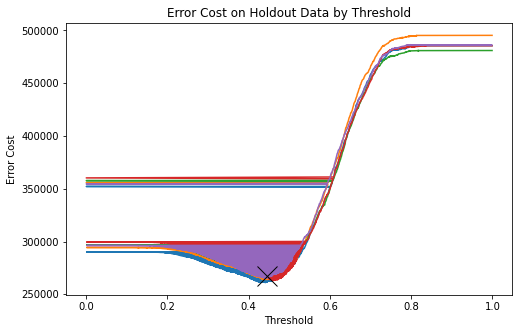

In [177]:
# Calculate empirical threshold with 5 folds
cutoff_cost_cv = lowest_error_cutoff_x(5,X_train,X_test, y_train, y_test,pred_proba)

In [178]:
# Save confusion matrix for comparison later
cmat_CV = metrics.confusion_matrix(y_test, np.where(pred_proba >=  cutoff_cost_cv[0], 1, 0)) # compute corresponding confusion matrix
print("The cutoff and cost, respectively, for the Bayes model were: {}".format(cutoff_cost_bayes))
print("The cross-validated threshold tuning approach gave us the following cutoff and cost, respectively: {}".format(cutoff_cost_cv))

The cutoff and cost, respectively, for the Bayes model were: [0.57624, 331819.75]
The cross-validated threshold tuning approach gave us the following cutoff and cost, respectively: [0.4462, 267580.5]


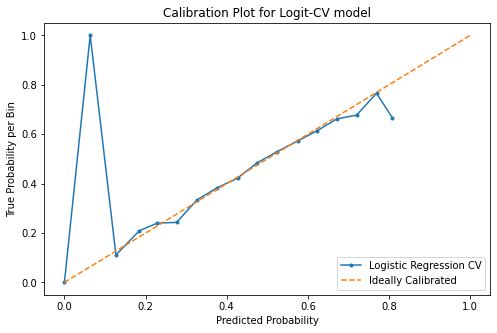

In [179]:
# Calibration curve for LogitCV
from sklearn.calibration import calibration_curve

# Calculate calibration using calibration_curve function
prob_true, prob_pred= calibration_curve(y_test, pred_proba, n_bins = 20)
plt.plot(prob_pred, prob_true, marker = '.', label = 'Logistic Regression CV')  
plt.title("Calibration Plot for Logit-CV model")
plt.ylabel("True Probability per Bin")
plt.xlabel("Predicted Probability") 
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated'); 
plt.legend();

##5.4 The MetaCost

In [180]:
def MetaCost(X_train, X_test, y_train, relabel_model, final_model, optimal_cutoff):
  # Use model with good calibration to predict the new labels and create probability predictions
  temp_pred_proba_train = relabel_model.fit(X_train, y_train.ravel()).predict_proba(X_train)[:,1]

  # Convert the probability predictions to class predictions using Bayes Decision Theory
  temp_pred_class_train = np.where(temp_pred_proba_train >= optimal_cutoff, 1, 0) # These are the new class labels

  # Fit a potent model to the test set, replacing our usual y_train with resulting class predictions from the last step
  final_model.fit(X_train, temp_pred_class_train.ravel())

  # Get predictions for the test set
  temp_pred_proba_test_cs = final_model.predict_proba(X_test)[:,1]

  return temp_pred_proba_test_cs

In [181]:
pred_proba_MC = MetaCost(X_train, X_test, y_train, LogisticRegression(), DecisionTreeClassifier(), threshold_bayes)
pred_proba_RF = DecisionTreeClassifier().fit(X_train, y_train.ravel()).predict_proba(X_test)[:,1];
cmat_MC = metrics.confusion_matrix(y_test, np.where(pred_proba_MC >=  0.5, 1, 0))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [182]:
# Evaluate by calcuating the error-cost
cutoff_cost_MC = calc_error_cost(pred_proba_MC, y_test, X_test, 0.5)
cutoff_cost_RF = calc_error_cost(pred_proba_RF, y_test, X_test,0.5)

print("The error-cost for the regular RF model is: {}".format(cutoff_cost_RF[1]))
print("The error-cost for the MetaCost approach is: {}".format(cutoff_cost_MC[1]))

The error-cost for the regular RF model is: 335243.25
The error-cost for the MetaCost approach is: 333672.0


##5.5 Comparison of cost-sensitive methods

In [183]:
# Summarize all cutoffs and error-costs in one DataFrame
cutoff_cost_df = pd.DataFrame([cutoff_cost_default, cutoff_cost_bayes, cutoff_cost_cv, cutoff_cost_MC], columns=["Cutoff", "Error-Cost"], index=['Default', 'Bayes', 'Cross-Validation', 'MetaCost'])
cutoff_cost_df

,Cutoff,Error-Cost
Default,0.50000,277282.00
Bayes,0.57624,331819.75
Cross-Validation,0.44620,267580.50
MetaCost,0.50000,333672.00


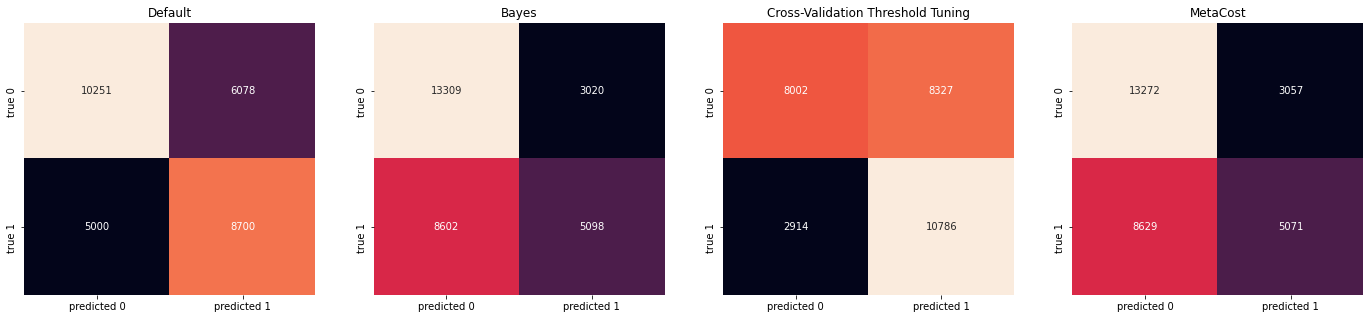

In [184]:
# Plot Confusion Matrix using Heatmap
plt.rcParams['figure.figsize'] = (24, 5)

import seaborn as sns
fig, ax_lst = plt.subplots(1, 4)
cmat_list = [cmat_default, cmat_bayes, cmat_CV, cmat_MC]
csm_types = ["Default", "Bayes", "Cross-Validation Threshold Tuning", "MetaCost"] # types of cost-sensitive methods

for i, j, ax in zip(cmat_list, csm_types, ax_lst.flat):

    # Plot heatmap
    ax.set_title(j)
    sns.heatmap(i, ax=ax, annot=True, fmt='g', cbar=False, xticklabels=['predicted 0', 'predicted 1'], yticklabels=['true 0', 'true 1'])
    
plt.show()

From the comparison, I choose logit model with cutoff=0.444. 
The reasons are 

1.  Logit model performs better and more stable than tree model.
2.  With cutoff=0.444, the AUC of logit model is lower, but it leads to best corresponding error cost

#6.Prediction

This part, I use test_clean dataset to predict if the customer return  the clothes or not with cutoff=0.444

In [185]:
test

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,age,delivery_time,day_of_week,reg_time
0,100001,2016-10-15,2017-01-10,iothers,40,grey,bothers,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87,Tuesday,0
1,100002,2016-10-15,2017-01-10,iothers,38,red,11,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87,Tuesday,0
2,100003,2016-10-15,2017-01-10,iothers,36,red,11,69,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87,Tuesday,0
3,100004,2016-10-15,2017-01-10,iothers,others,red,bothers,49,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87,Tuesday,0
4,100005,2016-10-15,2017-01-10,iothers,others,grey,102,59,56943,Mrs,1967-09-18,Baden-Wuerttemberg,2016-10-16,49,87,Tuesday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149996,2016-12-12,2016-12-13,iothers,42,brown,43,89,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1,Tuesday,664
49996,149997,2016-12-12,2016-12-13,1409,42,grey,3,16,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1,Tuesday,664
49997,149998,2016-12-12,2016-12-13,114,42,brown,43,79,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1,Tuesday,664
49998,149999,2016-12-12,2016-12-13,1409,46,grey,3,16,48001,Mrs,NaT,Lower Saxony,2015-02-17,50,1,Tuesday,664


In [186]:
test_clean

,age,delivery_time,item_price,reg_time,item_size,item_color,item_id,user_title,user_state,brand_id,day_of_week
0,49,87,69,0,40,grey,iothers,Mrs,Baden-Wuerttemberg,bothers,Tuesday
1,49,87,69,0,38,red,iothers,Mrs,Baden-Wuerttemberg,11,Tuesday
2,49,87,69,0,36,red,iothers,Mrs,Baden-Wuerttemberg,11,Tuesday
3,49,87,49,0,others,red,iothers,Mrs,Baden-Wuerttemberg,bothers,Tuesday
4,49,87,59,0,others,grey,iothers,Mrs,Baden-Wuerttemberg,102,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
49995,50,1,89,664,42,brown,iothers,Mrs,Lower Saxony,43,Tuesday
49996,50,1,16,664,42,grey,1409,Mrs,Lower Saxony,3,Tuesday
49997,50,1,79,664,42,brown,114,Mrs,Lower Saxony,43,Tuesday
49998,50,1,16,664,46,grey,1409,Mrs,Lower Saxony,3,Tuesday


In [187]:
cat_ohe_new = ohe.transform(test_clean[categorical_cols])
#Create a Pandas DataFrame of the hot encoded column
ohe_df_new = pd.DataFrame(cat_ohe_new, columns = ohe.get_feature_names(input_features = categorical_cols))
#concat with original data and drop original columns
df_ohe_new = pd.concat([test_clean, ohe_df_new], axis=1).drop(columns = categorical_cols, axis=1)

In [188]:
numeric_cols=['age','delivery_time','item_price','reg_time']

In [189]:
#Scaler the numerical cols
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_ohe_new[numeric_cols])
df_ohe_new[numeric_cols]=scaler.transform(df_ohe_new[numeric_cols])

In [190]:
p = logit.predict_proba(df_ohe_new)

In [191]:
df_ohe_new["p_logit"] = p[:,1]

In [192]:
cutoff=0.444

In [193]:
df_ohe_new['return'] = np.where(df_ohe_new['p_logit']>cutoff, 1, 0)

In [194]:
df_ohe_new

,age,delivery_time,item_price,reg_time,item_size_30,item_size_32,item_size_33,item_size_34,item_size_36,item_size_37,item_size_38,item_size_39,item_size_40,item_size_41,item_size_42,item_size_43,item_size_44,item_size_45,item_size_46,item_size_48,item_size_50,item_size_54,item_size_others,item_color_black,item_color_blue,item_color_brown,item_color_cothers,item_color_green,item_color_grey,item_color_pink,item_color_purple,item_color_red,item_color_white,item_color_yellow,item_id_100,item_id_108,item_id_113,item_id_114,item_id_116,item_id_118,...,brand_id_3,brand_id_30,brand_id_31,brand_id_33,brand_id_34,brand_id_36,brand_id_37,brand_id_38,brand_id_39,brand_id_4,brand_id_40,brand_id_42,brand_id_43,brand_id_44,brand_id_45,brand_id_46,brand_id_47,brand_id_48,brand_id_49,brand_id_5,brand_id_50,brand_id_51,brand_id_53,brand_id_54,brand_id_55,brand_id_6,brand_id_69,brand_id_7,brand_id_72,brand_id_90,brand_id_bothers,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,p_logit,return
0,0.557143,0.707317,0.292453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.365231,0
1,0.557143,0.707317,0.292453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.348130,0
2,0.557143,0.707317,0.292453,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.361098,0
3,0.557143,0.707317,0.198113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.198675,0
4,0.557143,0.707317,0.245283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.238304,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.571429,0.008130,0.386792,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.556390,1
49996,0.571429,0.008130,0.042453,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.468412,1
49997,0.571429,0.008130,0.339623,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [195]:
# read df_clean from pickle
DATA_DIR = '/content/drive/My Drive/kaggle/'
file_name = 'example_prediction.csv'
submission = pd.read_csv(DATA_DIR + file_name)
submission

,order_item_id,return
0,100001,0.465452
1,100002,0.465452
2,100003,0.465452
3,100004,0.435455
4,100005,0.450409
...,...,...
49995,149996,0.495700
49996,149997,0.387073
49997,149998,0.480558
49998,149999,0.387073


In [196]:
submission=submission.drop(columns='return')

In [197]:
submission['return']=df_ohe_new['return']

In [198]:
submission

,order_item_id,return
0,100001,0
1,100002,0
2,100003,0
3,100004,0
4,100005,0
...,...,...
49995,149996,1
49996,149997,1
49997,149998,1
49998,149999,1


In [199]:
#save the prediction to csv
submission.to_csv('/content/drive/My Drive/kaggle/predictions.csv')

#7.Disappointment and Improvment

From the prediction results, I could see there are many problems of the model.

1.   The error cost is high, wihch shows that the model is not stable and could not be fully representative. 
2.   From my prediction, I get the results that more customer returns their clothes, which is paradox with reality.

The reasons which lead to the dissapointments:

1.   The number of target variables equals to 0 and equals to 1 are nearly same.
2.   The features I choose are not really respentative, in reality, the factors that customers return their clothes would be affected by many factors. One of them could be personal preference, and it can not be observable.
3. In the part of finding cutoff with minimal error cost, I assume the overal dataset is i.i.d and get the cutoff. But the oberservations are not rrd.

Improvement of the model:

1.   Collect more balanced dataset 
2.   Take more features into consideration l
3. Conduct more tests of the model and find more suitable and reasonable hyperparameters



#8.Reference
The main references are tutorials.(chapter 6 and chapter 11)
1.   https://colab.research.google.com/drive/1LNS3_trbAroq9tBDteyRaWDZtU7ZezwR#scrollTo=-bGcqhNjcY9F

2.   https://colab.research.google.com/drive/1ddON6RUs_RnUQCuSwlyl5UJp65Hvseoe#scrollTo=zbRC1y7fRPh5
